In [134]:
import pandas as pd
pd.set_option('display.max_columns',30)
pd.set_option('display.max_rows',100)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
engine_readings = pd.read_csv('Data For Project/train_data.csv')

In [136]:
engine_readings

Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0             1             1                -0.0007                -0.0004   
1             1             2                 0.0019                -0.0003   
2             1             3                -0.0043                 0.0003   
3             1             4                 0.0007                 0.0000   
4             1             5                -0.0019                -0.0002   
...         ...           ...                    ...                    ...   
9904         50           194                 0.0037                 0.0004   
9905         50           195                 0.0019                -0.0004   
9906         50           196                 0.0020                -0.0002   
9907         50           197                -0.0026                -0.0001   
9908         50           198                 0.0039                 0.0001   

      Operation Condition 3      T2     T24      T30      T50     P2    P15  \
0                     100.0  518.67  641.82  1589.70  1400.60  14.62  21.61   
1                     100.0  518.67  642.15  1591.82  1403.14  14.62  21.61   
2                     100.0  518.67  642.35  1587.99  1404.20  14.62  21.61   
3                     100.0  518.67  642.35  1582.79  1401.87  14.62  21.61   
4                     100.0  518.67  642.37  1582.85  1406.22  14.62  21.61   
...                     ...     ...     ...      ...      ...    ...    ...   
9904                  100.0  518.67  643.77  1604.93  1423.51  14.62  21.61   
9905                  100.0  518.67  643.33  1605.31  1434.87  14.62  21.61   
9906                  100.0  518.67  643.32  1602.26  1430.01  14.62  21.61   
9907                  100.0  518.67  643.73  1599.94  1432.87  14.62  21.61   
9908                  100.0  518.67  643.83  1608.20  1433.88  14.62  21.61   

         P30       Nf       Nc  epr   Ps30     phi      NRf      NRc     BPR  \
0     554.36  2388.06  9046.19  1.3  47.47  521.66  2388.02  8138.62  8.4195   
1     553.75  2388.04  9044.07  1.3  47.49  522.28  2388.07  8131.49  8.4318   
2     554.26  2388.08  9052.94  1.3  47.27  522.42  2388.03  8133.23  8.4178   
3     554.45  2388.11  9049.48  1.3  47.13  522.86  2388.08  8133.83  8.3682   
4     554.00  2388.06  9055.15  1.3  47.28  522.19  2388.04  8133.80  8.4294   
...      ...      ...      ...  ...    ...     ...      ...      ...     ...   
9904  551.41  2388.18  9128.75  1.3  48.16  519.85  2388.19  8194.20  8.5043   
9905  551.25  2388.17  9134.70  1.3  48.14  519.33  2388.21  8200.90  8.5352   
9906  551.40  2388.19  9129.59  1.3  48.24  519.88  2388.17  8194.10  8.5034   
9907  551.18  2388.19  9132.97  1.3  48.22  519.48  2388.20  8194.64  8.5241   
9908  552.06  2388.20  9128.91  1.3  48.01  520.00  2388.25  8200.20  8.5002   

      farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0     0.03      392    2388      100.0  39.06  23.4190  
1     0.03      392    2388      100.0  39.00  23.4236  
2     0.03      390    2388      100.0  38.95  23.3442  
3     0.03      392    2388      100.0  38.88  23.3739  
4     0.03      393    2388      100.0  38.90  23.4044  
...    ...      ...     ...        ...    ...      ...  
9904  0.03      396    2388      100.0  38.42  23.0543  
9905  0.03      395    2388      100.0  38.45  23.0191  
9906  0.03      395    2388      100.0  38.45  23.0379  
9907  0.03      397    2388      100.0  38.52  23.0832  
9908  0.03      396    2388      100.0  38.43  23.1086  

[9909 rows x 26 columns]

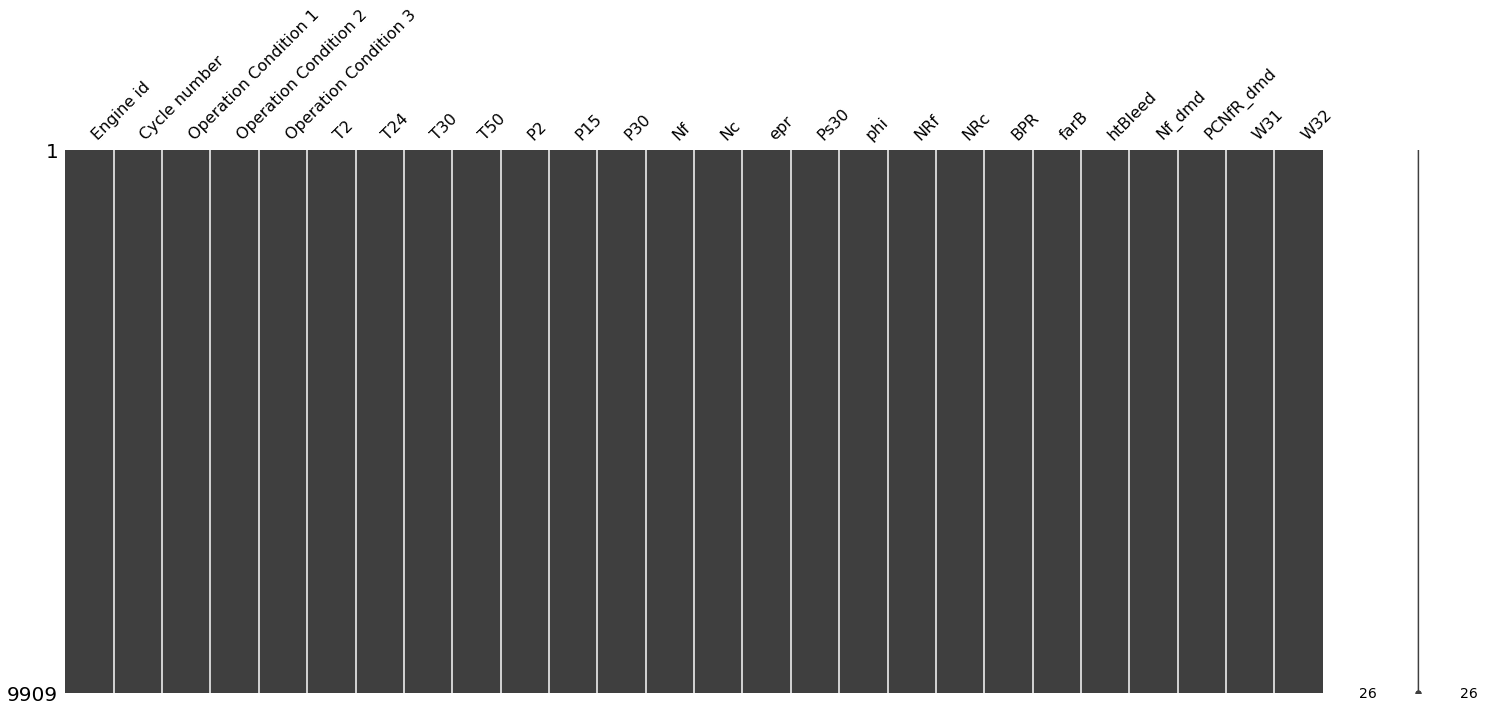

In [137]:
import missingno
missingno.matrix(engine_readings)

In [138]:
engine_readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 26 columns):
Engine id                9909 non-null int64
Cycle number             9909 non-null int64
Operation Condition 1    9909 non-null float64
Operation Condition 2    9909 non-null float64
Operation Condition 3    9909 non-null float64
T2                       9909 non-null float64
T24                      9909 non-null float64
T30                      9909 non-null float64
T50                      9909 non-null float64
P2                       9909 non-null float64
P15                      9909 non-null float64
P30                      9909 non-null float64
Nf                       9909 non-null float64
Nc                       9909 non-null float64
epr                      9909 non-null float64
Ps30                     9909 non-null float64
phi                      9909 non-null float64
NRf                      9909 non-null float64
NRc                      9909 non-null float64
BPR 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

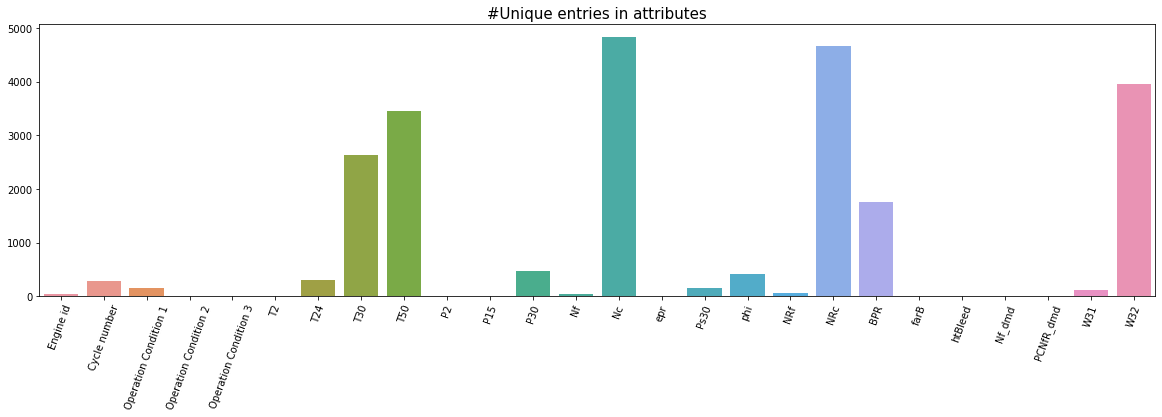

In [139]:
plt.figure(figsize=(20,5))
cols = list()
unq_items = list()
for col in engine_readings.columns:
    cols.append(col) 
    unq_items.append(len(engine_readings[col].unique()))
    
    
sns.barplot(cols,unq_items)
plt.title('#Unique entries in attributes',fontsize=15)
plt.xticks(rotation=70)

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


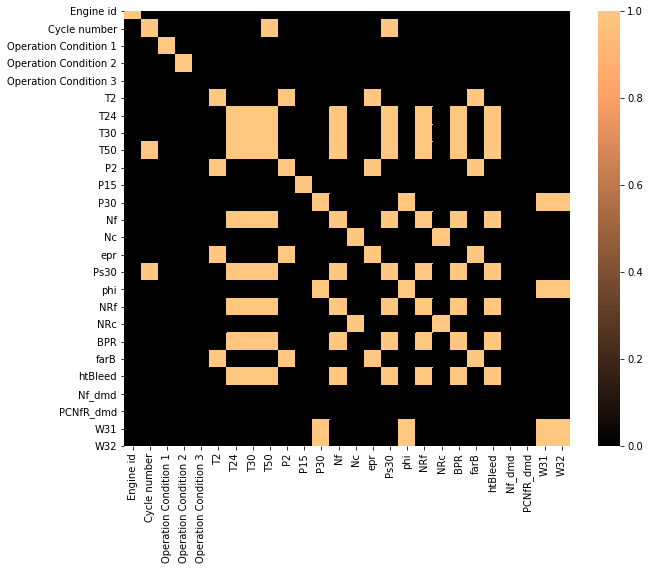

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(engine_readings.corr()>0.6,cmap='copper')

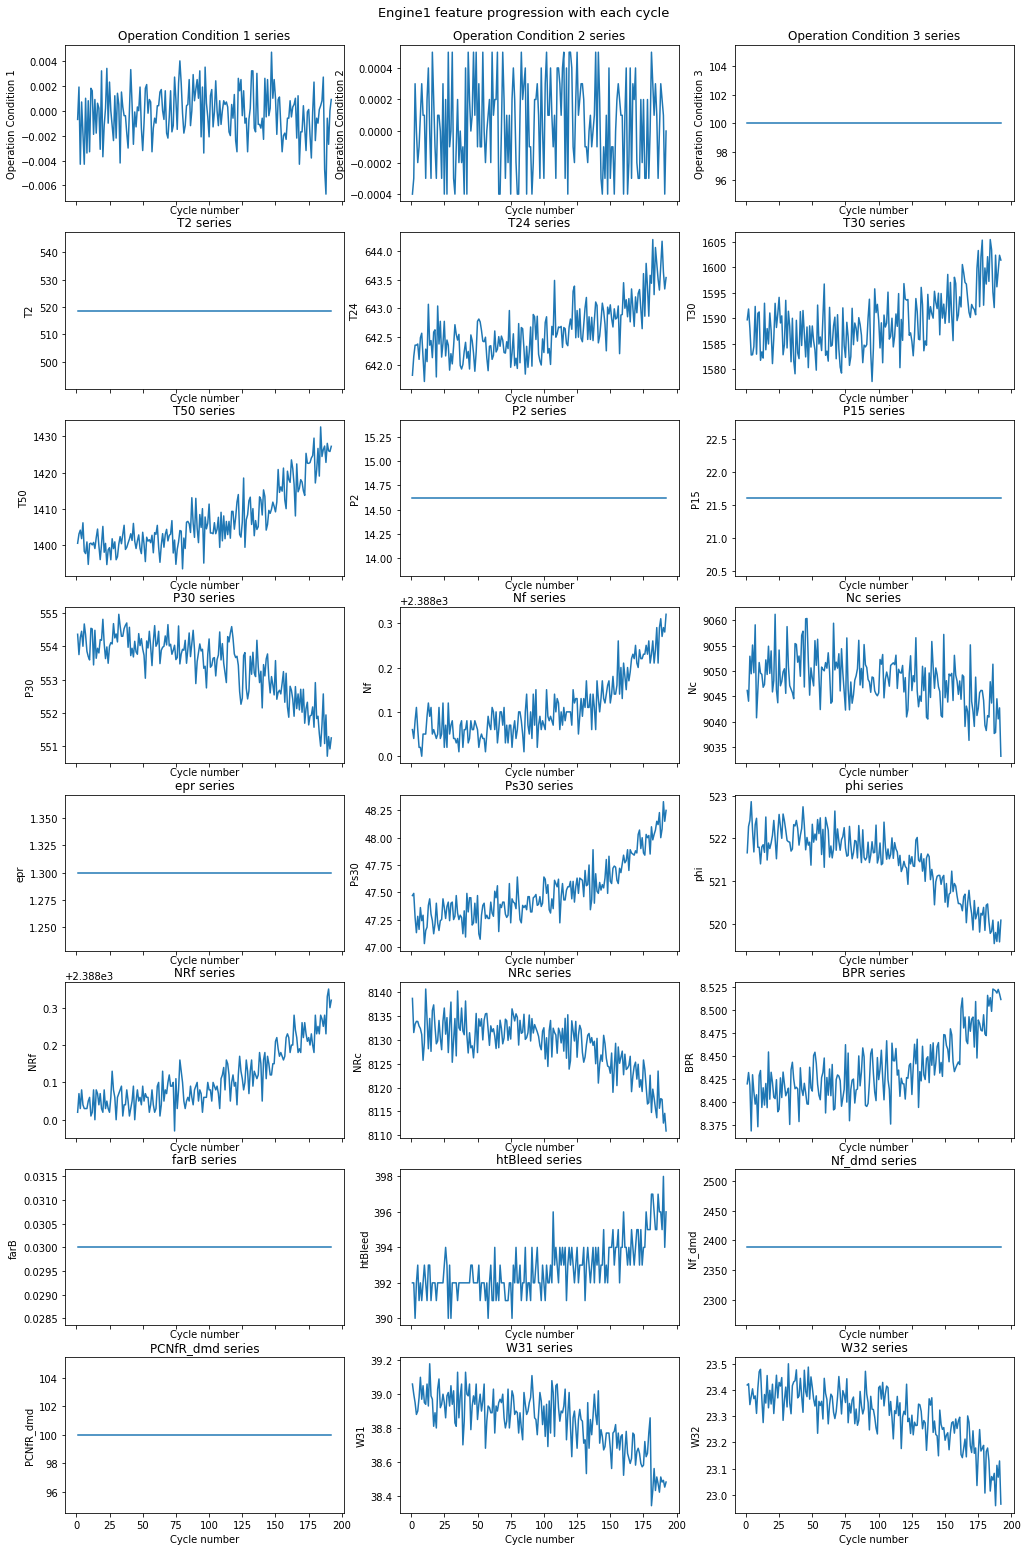

In [141]:
plt.rcParams['figure.figsize'] = (17,27)
fig, axs = plt.subplots(ncols=3,nrows=8,sharex=True)


axs = axs.flatten()
cols = engine_readings.drop(labels=['Engine id','Cycle number'],axis=1)

for ax, col in zip(axs,cols):
    ax.plot(engine_readings['Cycle number'][:192],engine_readings[col][:192])
    ax.set_xlabel('Cycle number')
    ax.set_ylabel(col)
    ax.set_title('{} series'.format(col))
    
plt.suptitle('Engine1 feature progression with each cycle',fontsize=13,y=0.9)
plt.show()

    The operation conditions 1,2 and 3 all seem to be constant or constant on an average. 
    T2, P2, P15, epr, farB, Nf_dmd_series, PCNfR_dmd are also constant through out
    T24, T30, T50, P30, Nf, Nc, Ps30, phi, NRf, NRc, BPR, htBleed, W31, W32 are the ones that had any change(the change is visible as well) with respect to cycle number
    
    However, the above analysis is based only on Engine1. Let's verify if our insight holds to other engines as well. Since it's very timetaking to check the above for each and every engine, we shall pick 10 random engines and see

In [142]:
change_cols = '''T24, T30, T50, P30, Nf, Nc, Ps30, phi, NRf, NRc, BPR, htBleed, W31, W32'''.split(', ')
no_change_cols = '''T2, P2, P15, epr, farB, Nf_dmd, PCNfR_dmd'''.split(', ')
opr_cond = '''Operation Condition 1, Operation Condition 2, Operation Condition 3'''.split(', ')

rand_10 = np.random.randint(2,50,size = 9)

In [143]:
rand_10

array([36, 31, 26, 17, 45, 39,  7, 26, 17])

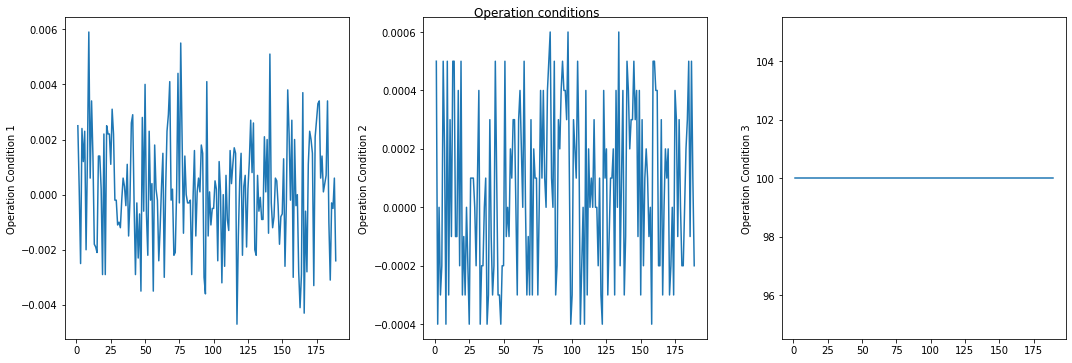

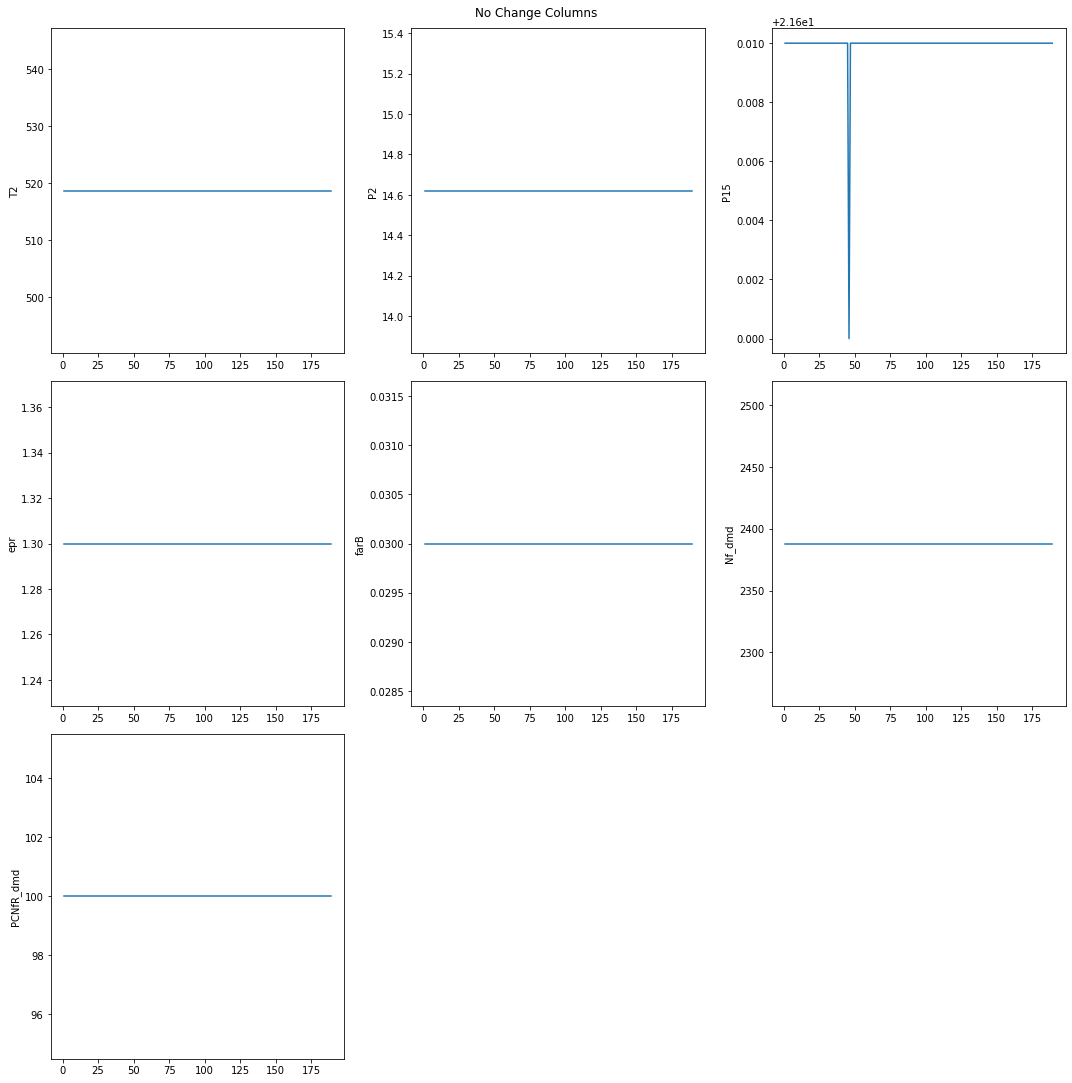

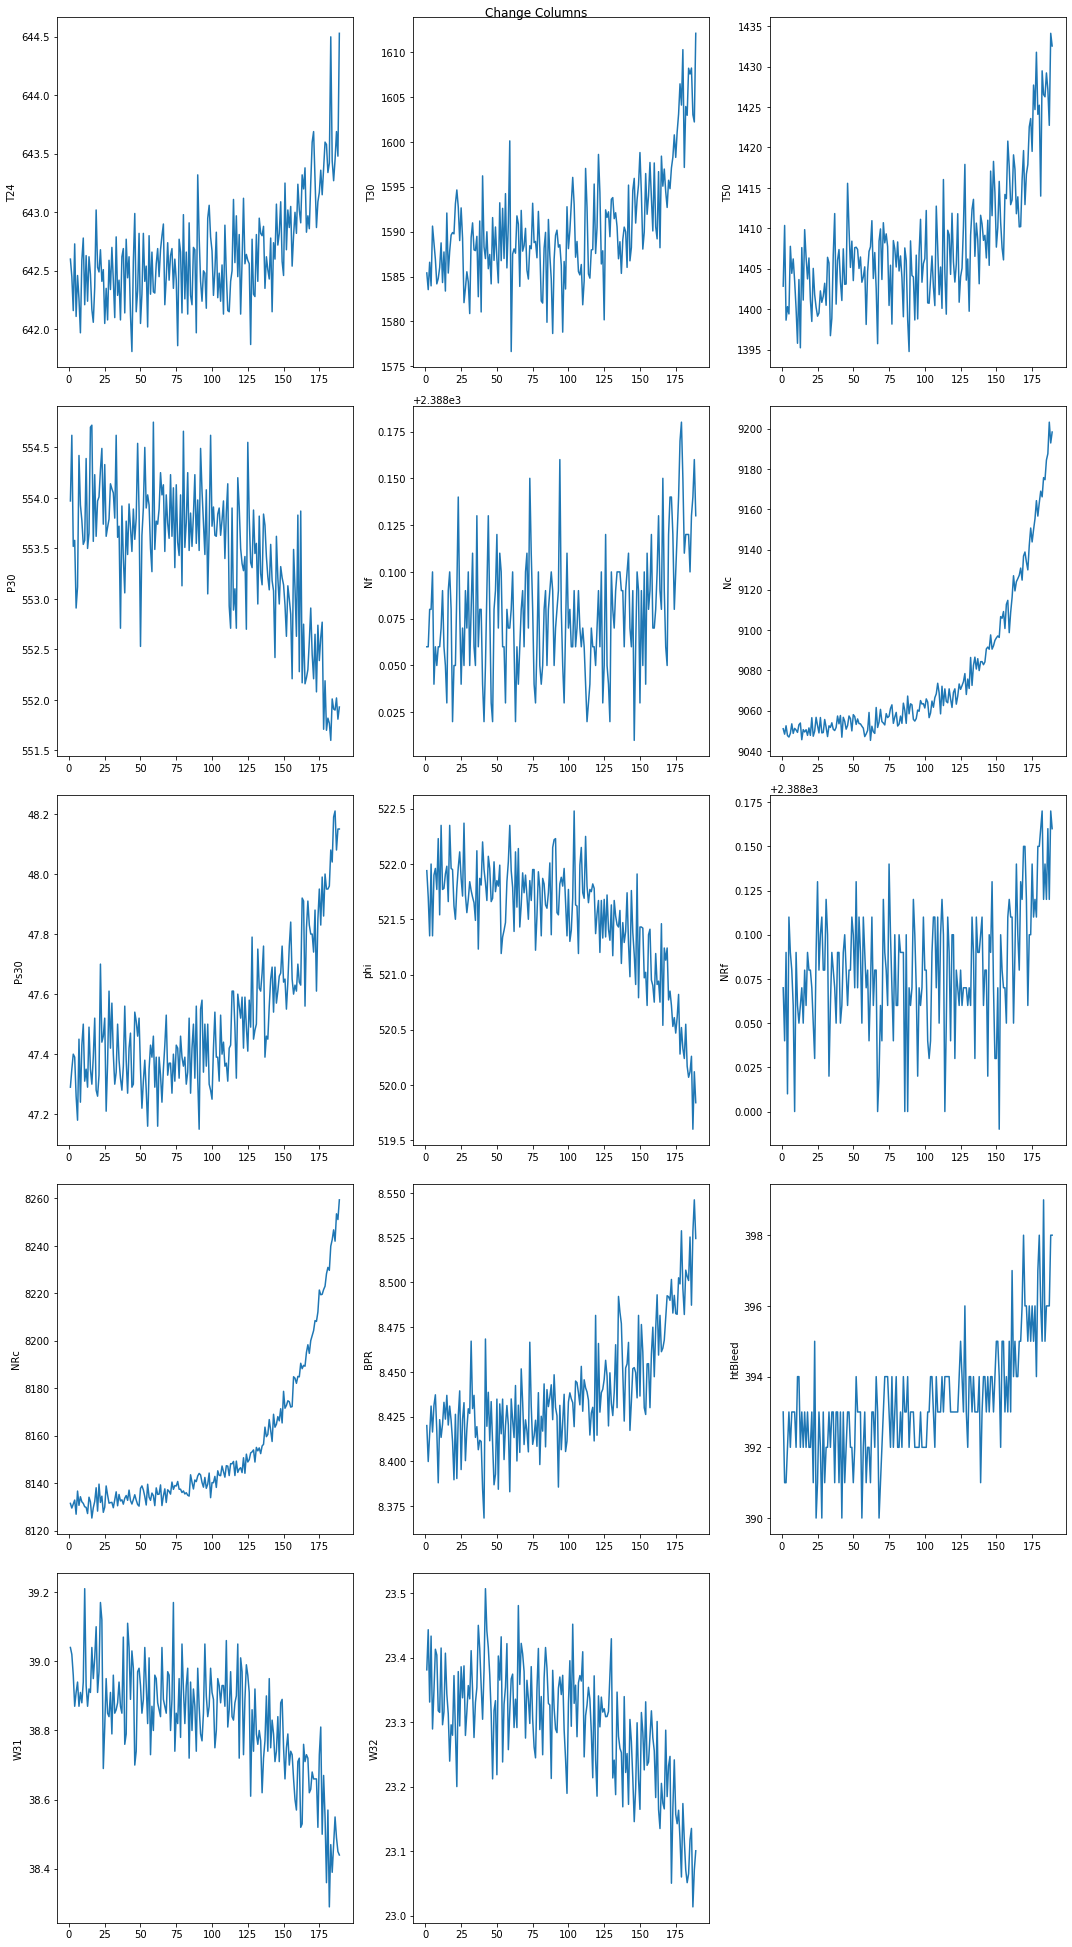

In [144]:
def plot_engine_graphs(eng_num):
    df = engine_readings[engine_readings['Engine id']==eng_num]
    
    opr_fig, opr_axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    opr_axs = opr_axs.flatten()
    for ax ,col in zip(opr_axs,opr_cond):
        ax.plot(df['Cycle number'],df[col])
        ax.set_ylabel(col)
    plt.suptitle('Operation conditions',y = 1)    
    plt.show()
    
    no_chng_fig, no_chng_axs = plt.subplots(nrows=3, ncols = 3,figsize=(15,15),tight_layout=True)
    no_chng_axs = no_chng_axs.flatten()
    for ax, col in zip(no_chng_axs,no_change_cols):
        ax.plot(df['Cycle number'],df[col])
        ax.set_ylabel(col)
    plt.suptitle('No Change Columns',y=1)    
    no_chng_axs[-1].axis('off')
    no_chng_axs[-2].axis('off')
    plt.show()
    
    chng_fig, chng_axs = plt.subplots(nrows=5,ncols=3,figsize=(15, 27),tight_layout=True)
    chng_axs = chng_axs.flatten()
    for ax, col in zip(chng_axs, change_cols):
        ax.plot(df['Cycle number'],df[col])
        ax.set_ylabel(col)
    plt.suptitle('Change Columns',y=1)    
    chng_axs[-1].axis('off')
    plt.show()
    
    
plot_engine_graphs(eng_num=4)

    For all the 10 engines, operational and no change columns did remain constant. While the change columns exhibited similar patterns. Though these change columns had patterns close to an exponential curve, there's something else common amongst them: the beginning part of curve is always almost constant and only after a few cycles does the pattern emerge. This makes sense because it is not expected to find deterioration in the engine right from the first cycle

In [145]:
cycles_each_engine = engine_readings.groupby(by='Engine id')['Cycle number'].count()
cycles_each_engine

Engine id
1     192
2     287
3     179
4     189
5     269
6     188
7     259
8     150
9     201
10    222
11    240
12    170
13    163
14    180
15    207
16    209
17    276
18    195
19    158
20    234
21    195
22    202
23    168
24    147
25    230
26    199
27    156
28    165
29    163
30    194
31    234
32    191
33    200
34    195
35    181
36    158
37    170
38    194
39    128
40    188
41    216
42    196
43    207
44    192
45    158
46    256
47    214
48    231
49    215
50    198
Name: Cycle number, dtype: int64

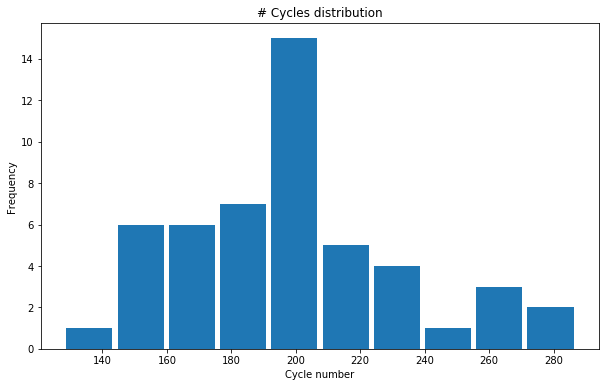

In [146]:
plt.figure(figsize=(10,6))

plt.hist(cycles_each_engine,rwidth=0.9)
plt.xlabel('Cycle number')
plt.ylabel('Frequency')
plt.title('# Cycles distribution')

plt.show()

In [147]:
cycles_each_engine.min(), cycles_each_engine.max()

(128, 287)

In [148]:
sum(cycles_each_engine < 150)

2

    From the plots to identify change columns we noticed there isn't any change in the health for the first few cycles and from the histogram above, we see that the # cycles for each engine has a bunch of engines around 200 cycles. Only 2 of them have # cycles less than 150. Combining the both we can try to set a lower limit on the number of cycles around 100(i.e, all cycle numbers below a certain threshold we choose will be the threshold itself) since till that many cycles we haven't observed any deterioration
    
    
    Assuming the number of remaining cycles are linear, we can calculate the remaining cycles as the difference between max_cycles for that engine and the current cycle number and then apply a linear algorithm

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


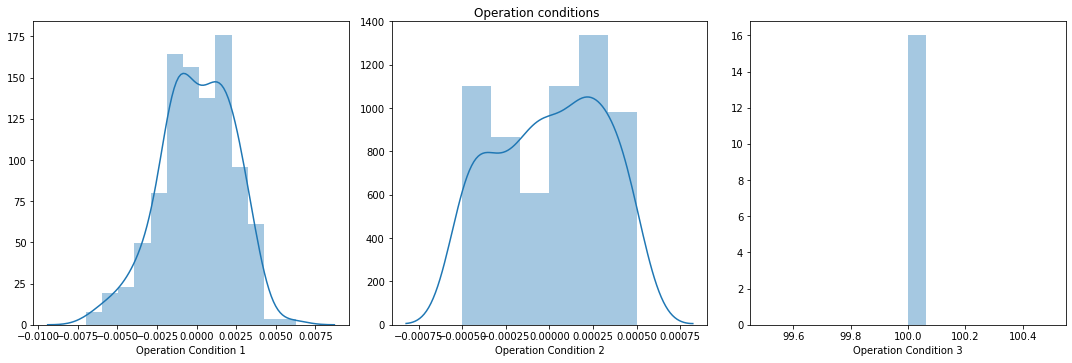

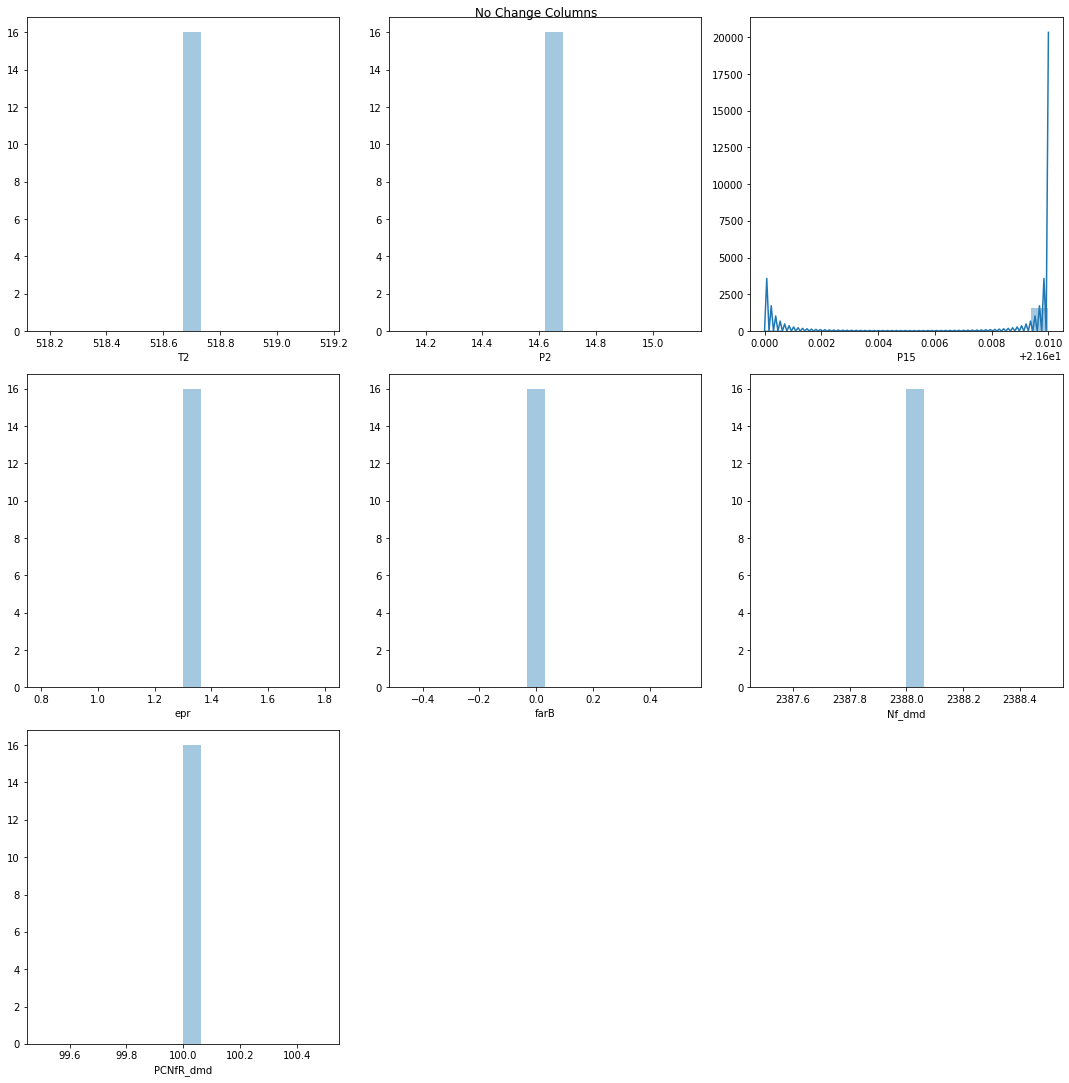

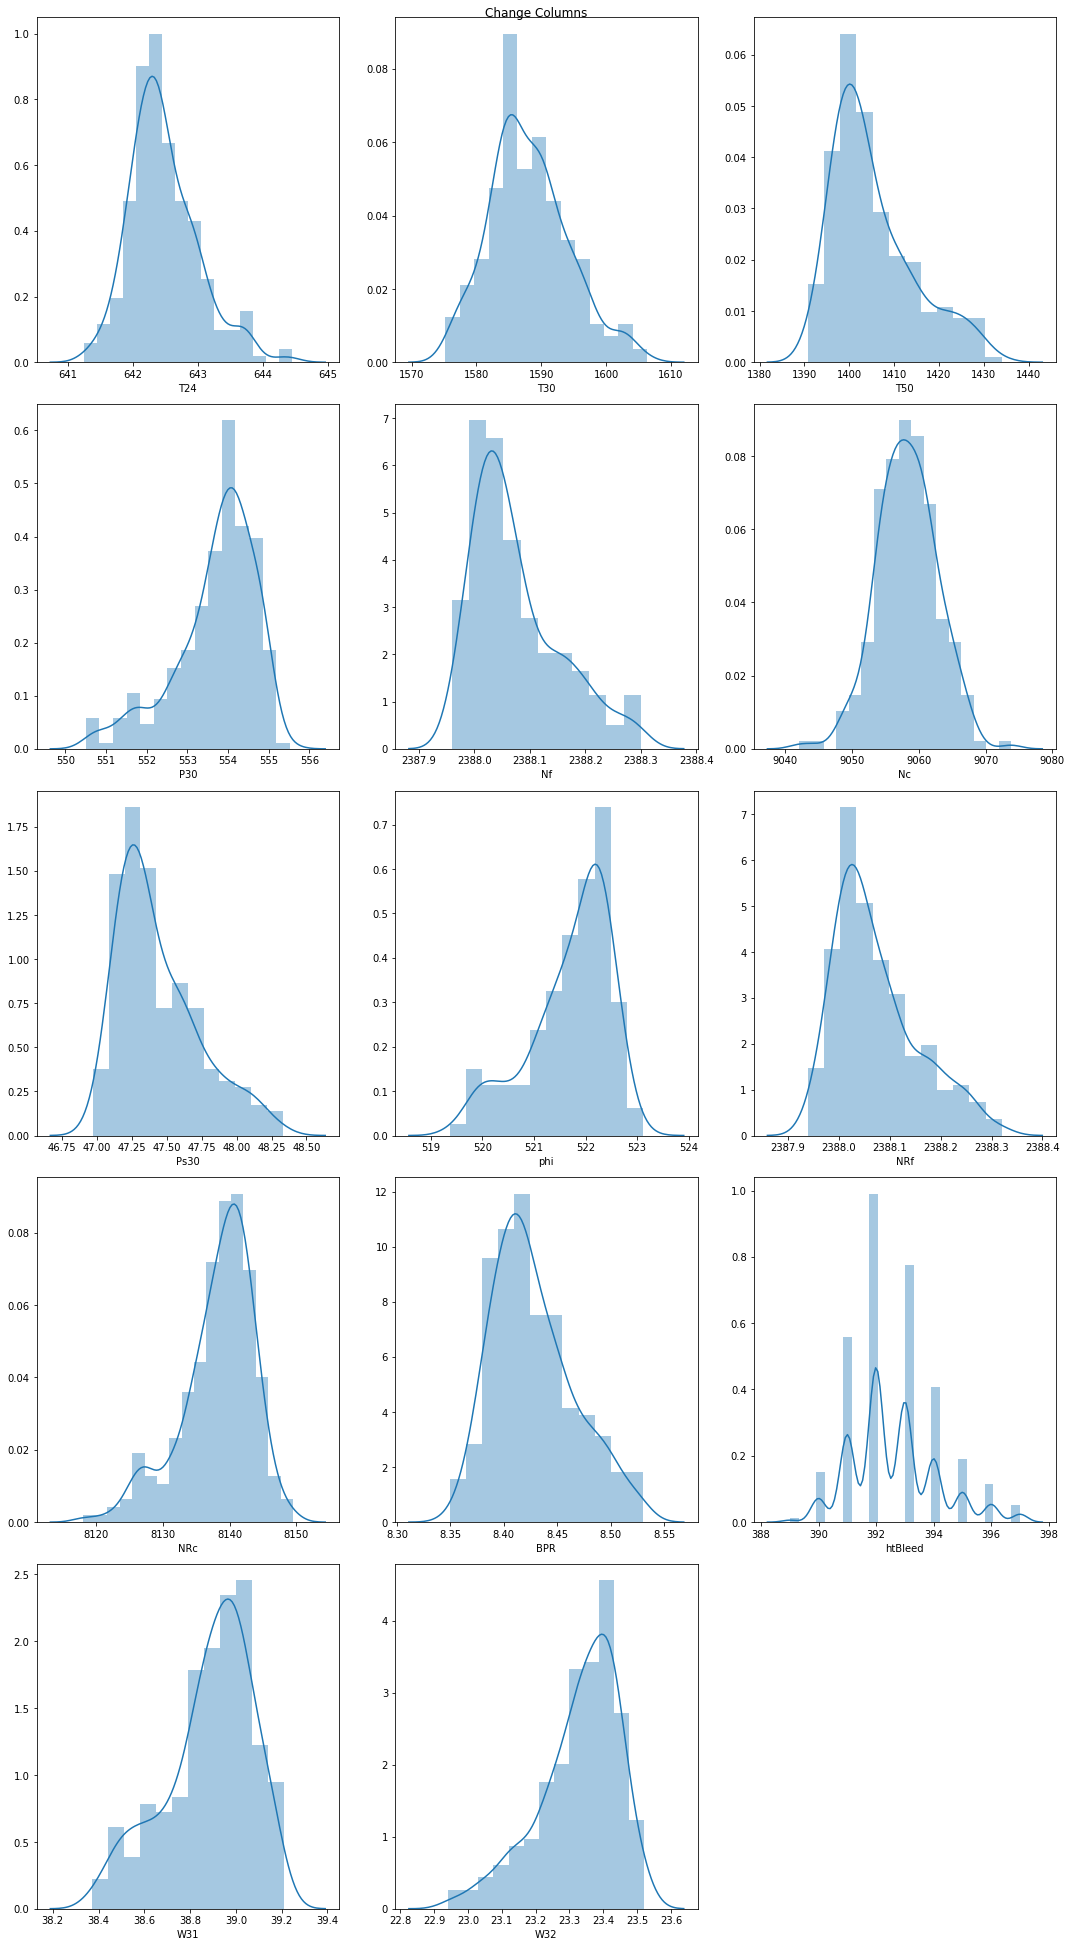

In [149]:
def plot_sensor_dist(eng_num):
    df = engine_readings[engine_readings['Engine id']==eng_num]
    
    opr_fig, opr_axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    opr_axs = opr_axs.flatten()
    for ax ,col in zip(opr_axs,opr_cond):
        #ax.hist(df[col],density=True)
        sns.distplot(df[col],kde=True,ax=ax)
        ax.set_xlabel(col)
    plt.suptitle('Operation conditions',y = 1)    
    plt.show()
    
    no_chng_fig, no_chng_axs = plt.subplots(nrows=3, ncols = 3,figsize=(15,15),tight_layout=True)
    no_chng_axs = no_chng_axs.flatten()
    for ax, col in zip(no_chng_axs,no_change_cols):
        #ax.hist(df[col],density=True)
        sns.distplot(df[col],kde=True,ax=ax)
        ax.set_xlabel(col)
    plt.suptitle('No Change Columns',y=1)    
    no_chng_axs[-1].axis('off')
    no_chng_axs[-2].axis('off')
    plt.show()
    
    chng_fig, chng_axs = plt.subplots(nrows=5,ncols=3,figsize=(15, 27),tight_layout=True)
    chng_axs = chng_axs.flatten()
    for ax, col in zip(chng_axs, change_cols):
        #ax.hist(df[col],density=True)
        sns.distplot(df[col],kde=True,ax=ax)
        ax.set_xlabel(col)
    plt.suptitle('Change Columns',y=1)    
    chng_axs[-1].axis('off')
    plt.show()
    
    
plot_sensor_dist(eng_num=46)

In [150]:
readings_no_op = engine_readings.drop(labels=no_change_cols+opr_cond,axis=1).copy()
readings_no_op

Engine id  Cycle number     T24      T30      T50     P30       Nf  \
0             1             1  641.82  1589.70  1400.60  554.36  2388.06   
1             1             2  642.15  1591.82  1403.14  553.75  2388.04   
2             1             3  642.35  1587.99  1404.20  554.26  2388.08   
3             1             4  642.35  1582.79  1401.87  554.45  2388.11   
4             1             5  642.37  1582.85  1406.22  554.00  2388.06   
...         ...           ...     ...      ...      ...     ...      ...   
9904         50           194  643.77  1604.93  1423.51  551.41  2388.18   
9905         50           195  643.33  1605.31  1434.87  551.25  2388.17   
9906         50           196  643.32  1602.26  1430.01  551.40  2388.19   
9907         50           197  643.73  1599.94  1432.87  551.18  2388.19   
9908         50           198  643.83  1608.20  1433.88  552.06  2388.20   

           Nc   Ps30     phi      NRf      NRc     BPR  htBleed    W31  \
0     9046.19  47.47  521.66  2388.02  8138.62  8.4195      392  39.06   
1     9044.07  47.49  522.28  2388.07  8131.49  8.4318      392  39.00   
2     9052.94  47.27  522.42  2388.03  8133.23  8.4178      390  38.95   
3     9049.48  47.13  522.86  2388.08  8133.83  8.3682      392  38.88   
4     9055.15  47.28  522.19  2388.04  8133.80  8.4294      393  38.90   
...       ...    ...     ...      ...      ...     ...      ...    ...   
9904  9128.75  48.16  519.85  2388.19  8194.20  8.5043      396  38.42   
9905  9134.70  48.14  519.33  2388.21  8200.90  8.5352      395  38.45   
9906  9129.59  48.24  519.88  2388.17  8194.10  8.5034      395  38.45   
9907  9132.97  48.22  519.48  2388.20  8194.64  8.5241      397  38.52   
9908  9128.91  48.01  520.00  2388.25  8200.20  8.5002      396  38.43   

          W32  
0     23.4190  
1     23.4236  
2     23.3442  
3     23.3739  
4     23.4044  
...       ...  
9904  23.0543  
9905  23.0191  
9906  23.0379  
9907  23.0832  
9908  23.1086  

[9909 rows x 16 columns]

In [151]:
#create a new column => cycles_to_failure which is diff(max(cycle of engine), curr_cyle of engine)
calculate_cycles_to_failure = lambda row: cycles_each_engine[row['Engine id']] - row['Cycle number']
readings_no_op['cycles_to_failure'] = readings_no_op[['Engine id','Cycle number']].apply(calculate_cycles_to_failure,axis=1)

In [152]:
readings_no_op

Engine id  Cycle number     T24      T30      T50     P30       Nf  \
0             1             1  641.82  1589.70  1400.60  554.36  2388.06   
1             1             2  642.15  1591.82  1403.14  553.75  2388.04   
2             1             3  642.35  1587.99  1404.20  554.26  2388.08   
3             1             4  642.35  1582.79  1401.87  554.45  2388.11   
4             1             5  642.37  1582.85  1406.22  554.00  2388.06   
...         ...           ...     ...      ...      ...     ...      ...   
9904         50           194  643.77  1604.93  1423.51  551.41  2388.18   
9905         50           195  643.33  1605.31  1434.87  551.25  2388.17   
9906         50           196  643.32  1602.26  1430.01  551.40  2388.19   
9907         50           197  643.73  1599.94  1432.87  551.18  2388.19   
9908         50           198  643.83  1608.20  1433.88  552.06  2388.20   

           Nc   Ps30     phi      NRf      NRc     BPR  htBleed    W31  \
0     9046.19  47.47  521.66  2388.02  8138.62  8.4195      392  39.06   
1     9044.07  47.49  522.28  2388.07  8131.49  8.4318      392  39.00   
2     9052.94  47.27  522.42  2388.03  8133.23  8.4178      390  38.95   
3     9049.48  47.13  522.86  2388.08  8133.83  8.3682      392  38.88   
4     9055.15  47.28  522.19  2388.04  8133.80  8.4294      393  38.90   
...       ...    ...     ...      ...      ...     ...      ...    ...   
9904  9128.75  48.16  519.85  2388.19  8194.20  8.5043      396  38.42   
9905  9134.70  48.14  519.33  2388.21  8200.90  8.5352      395  38.45   
9906  9129.59  48.24  519.88  2388.17  8194.10  8.5034      395  38.45   
9907  9132.97  48.22  519.48  2388.20  8194.64  8.5241      397  38.52   
9908  9128.91  48.01  520.00  2388.25  8200.20  8.5002      396  38.43   

          W32  cycles_to_failure  
0     23.4190                191  
1     23.4236                190  
2     23.3442                189  
3     23.3739                188  
4     23.4044                187  
...       ...                ...  
9904  23.0543                  4  
9905  23.0191                  3  
9906  23.0379                  2  
9907  23.0832                  1  
9908  23.1086                  0  

[9909 rows x 17 columns]

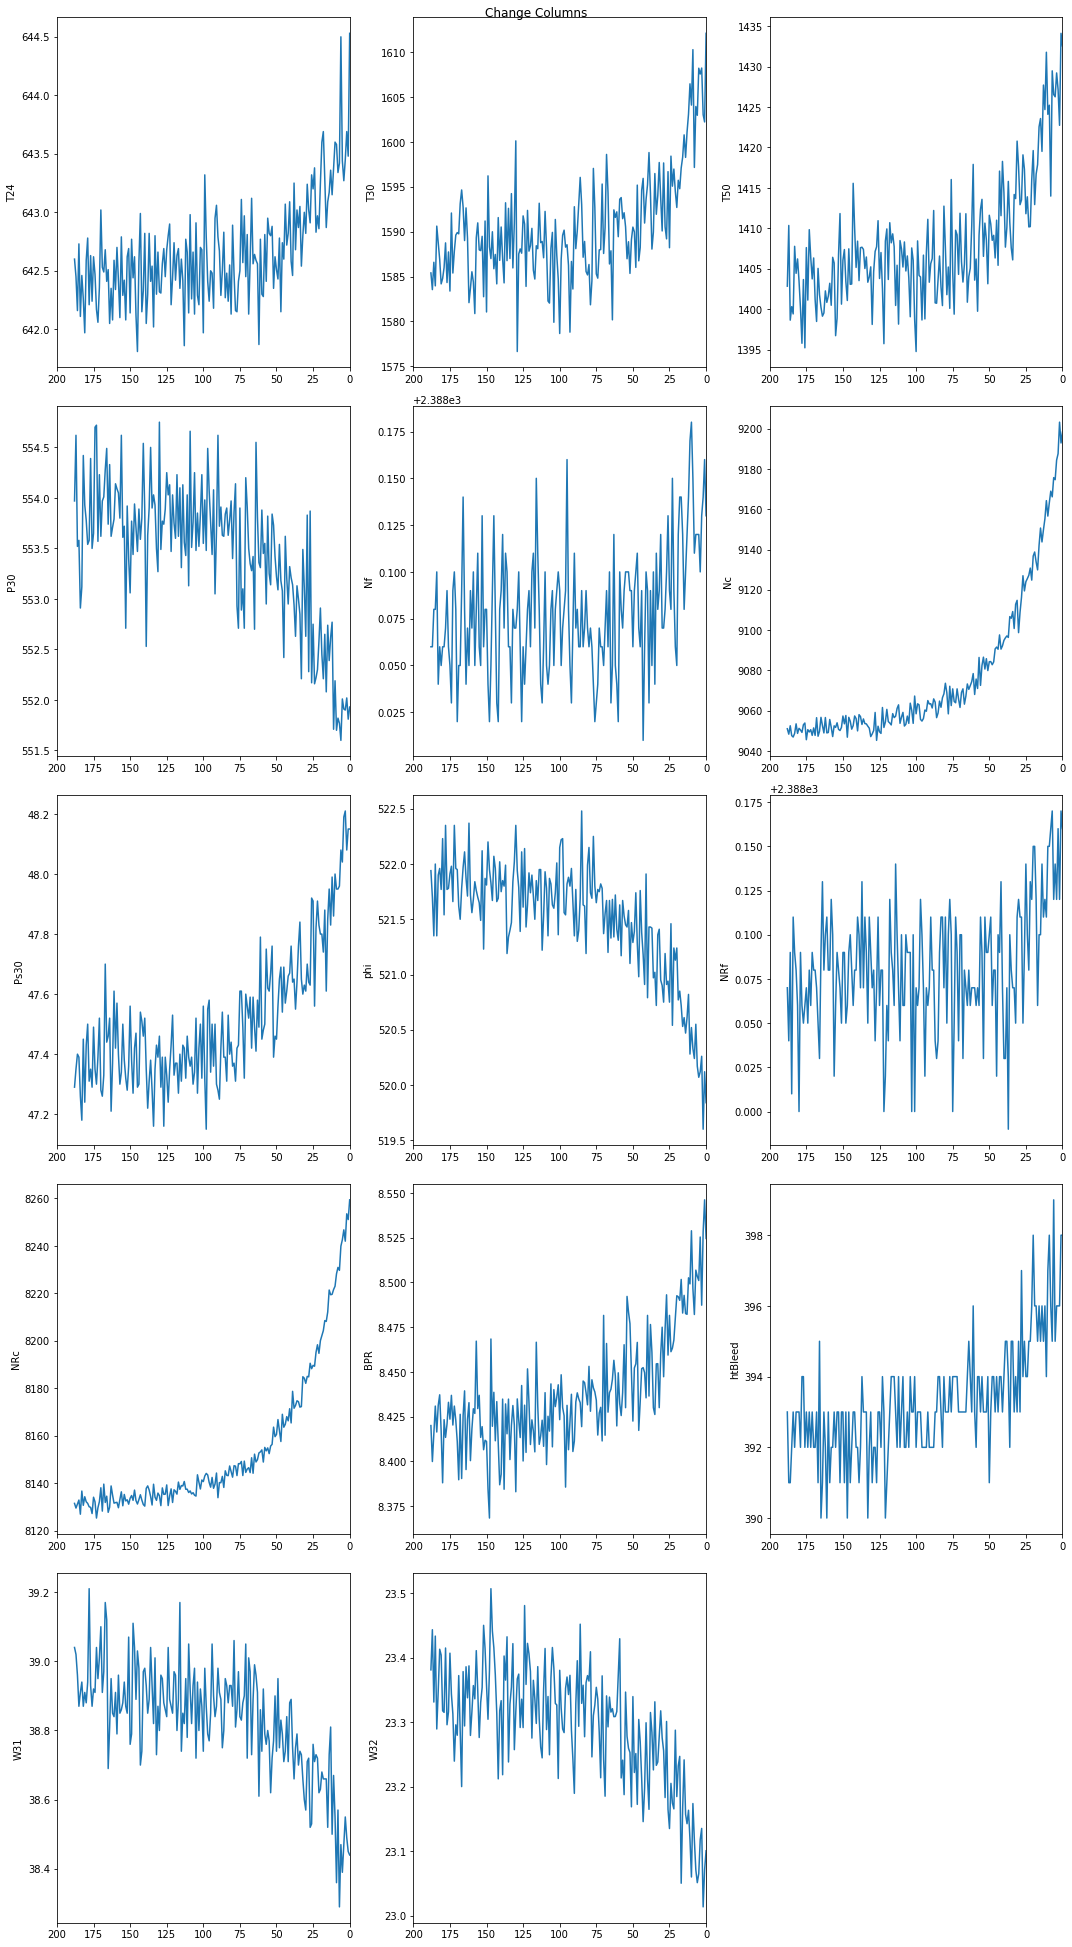

In [236]:
def plot_engine_graphs(eng_num):
    df = readings_no_op[readings_no_op['Engine id']==eng_num]
    
    '''opr_fig, opr_axs = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    opr_axs = opr_axs.flatten()
    for ax ,col in zip(opr_axs,opr_cond):
        ax.plot(df['cycles_to_failure'],df[col])
        ax.set_ylabel(col)
    plt.suptitle('Operation conditions',y = 1)    
    plt.show()
    
    
    no_chng_fig, no_chng_axs = plt.subplots(nrows=3, ncols = 3,figsize=(15,15),tight_layout=True)
    no_chng_axs = no_chng_axs.flatten()
    for ax, col in zip(no_chng_axs,no_change_cols):
        ax.plot(df['cycles_to_failure'],df[col])
        ax.set_ylabel(col)
    plt.suptitle('No Change Columns',y=1)    
    no_chng_axs[-1].axis('off')
    no_chng_axs[-2].axis('off')
    plt.show()
    '''
    
    chng_fig, chng_axs = plt.subplots(nrows=5,ncols=3,figsize=(15, 27),tight_layout=True)
    chng_axs = chng_axs.flatten()
    for ax, col in zip(chng_axs, change_cols):
        ax.plot(df['cycles_to_failure'],df[col])
        ax.set_ylabel(col)
        ax.set_xlim(200,0,-1)
    plt.suptitle('Change Columns',y=1)    
    chng_axs[-1].axis('off')
    plt.show()
    
    
plot_engine_graphs(eng_num=4)

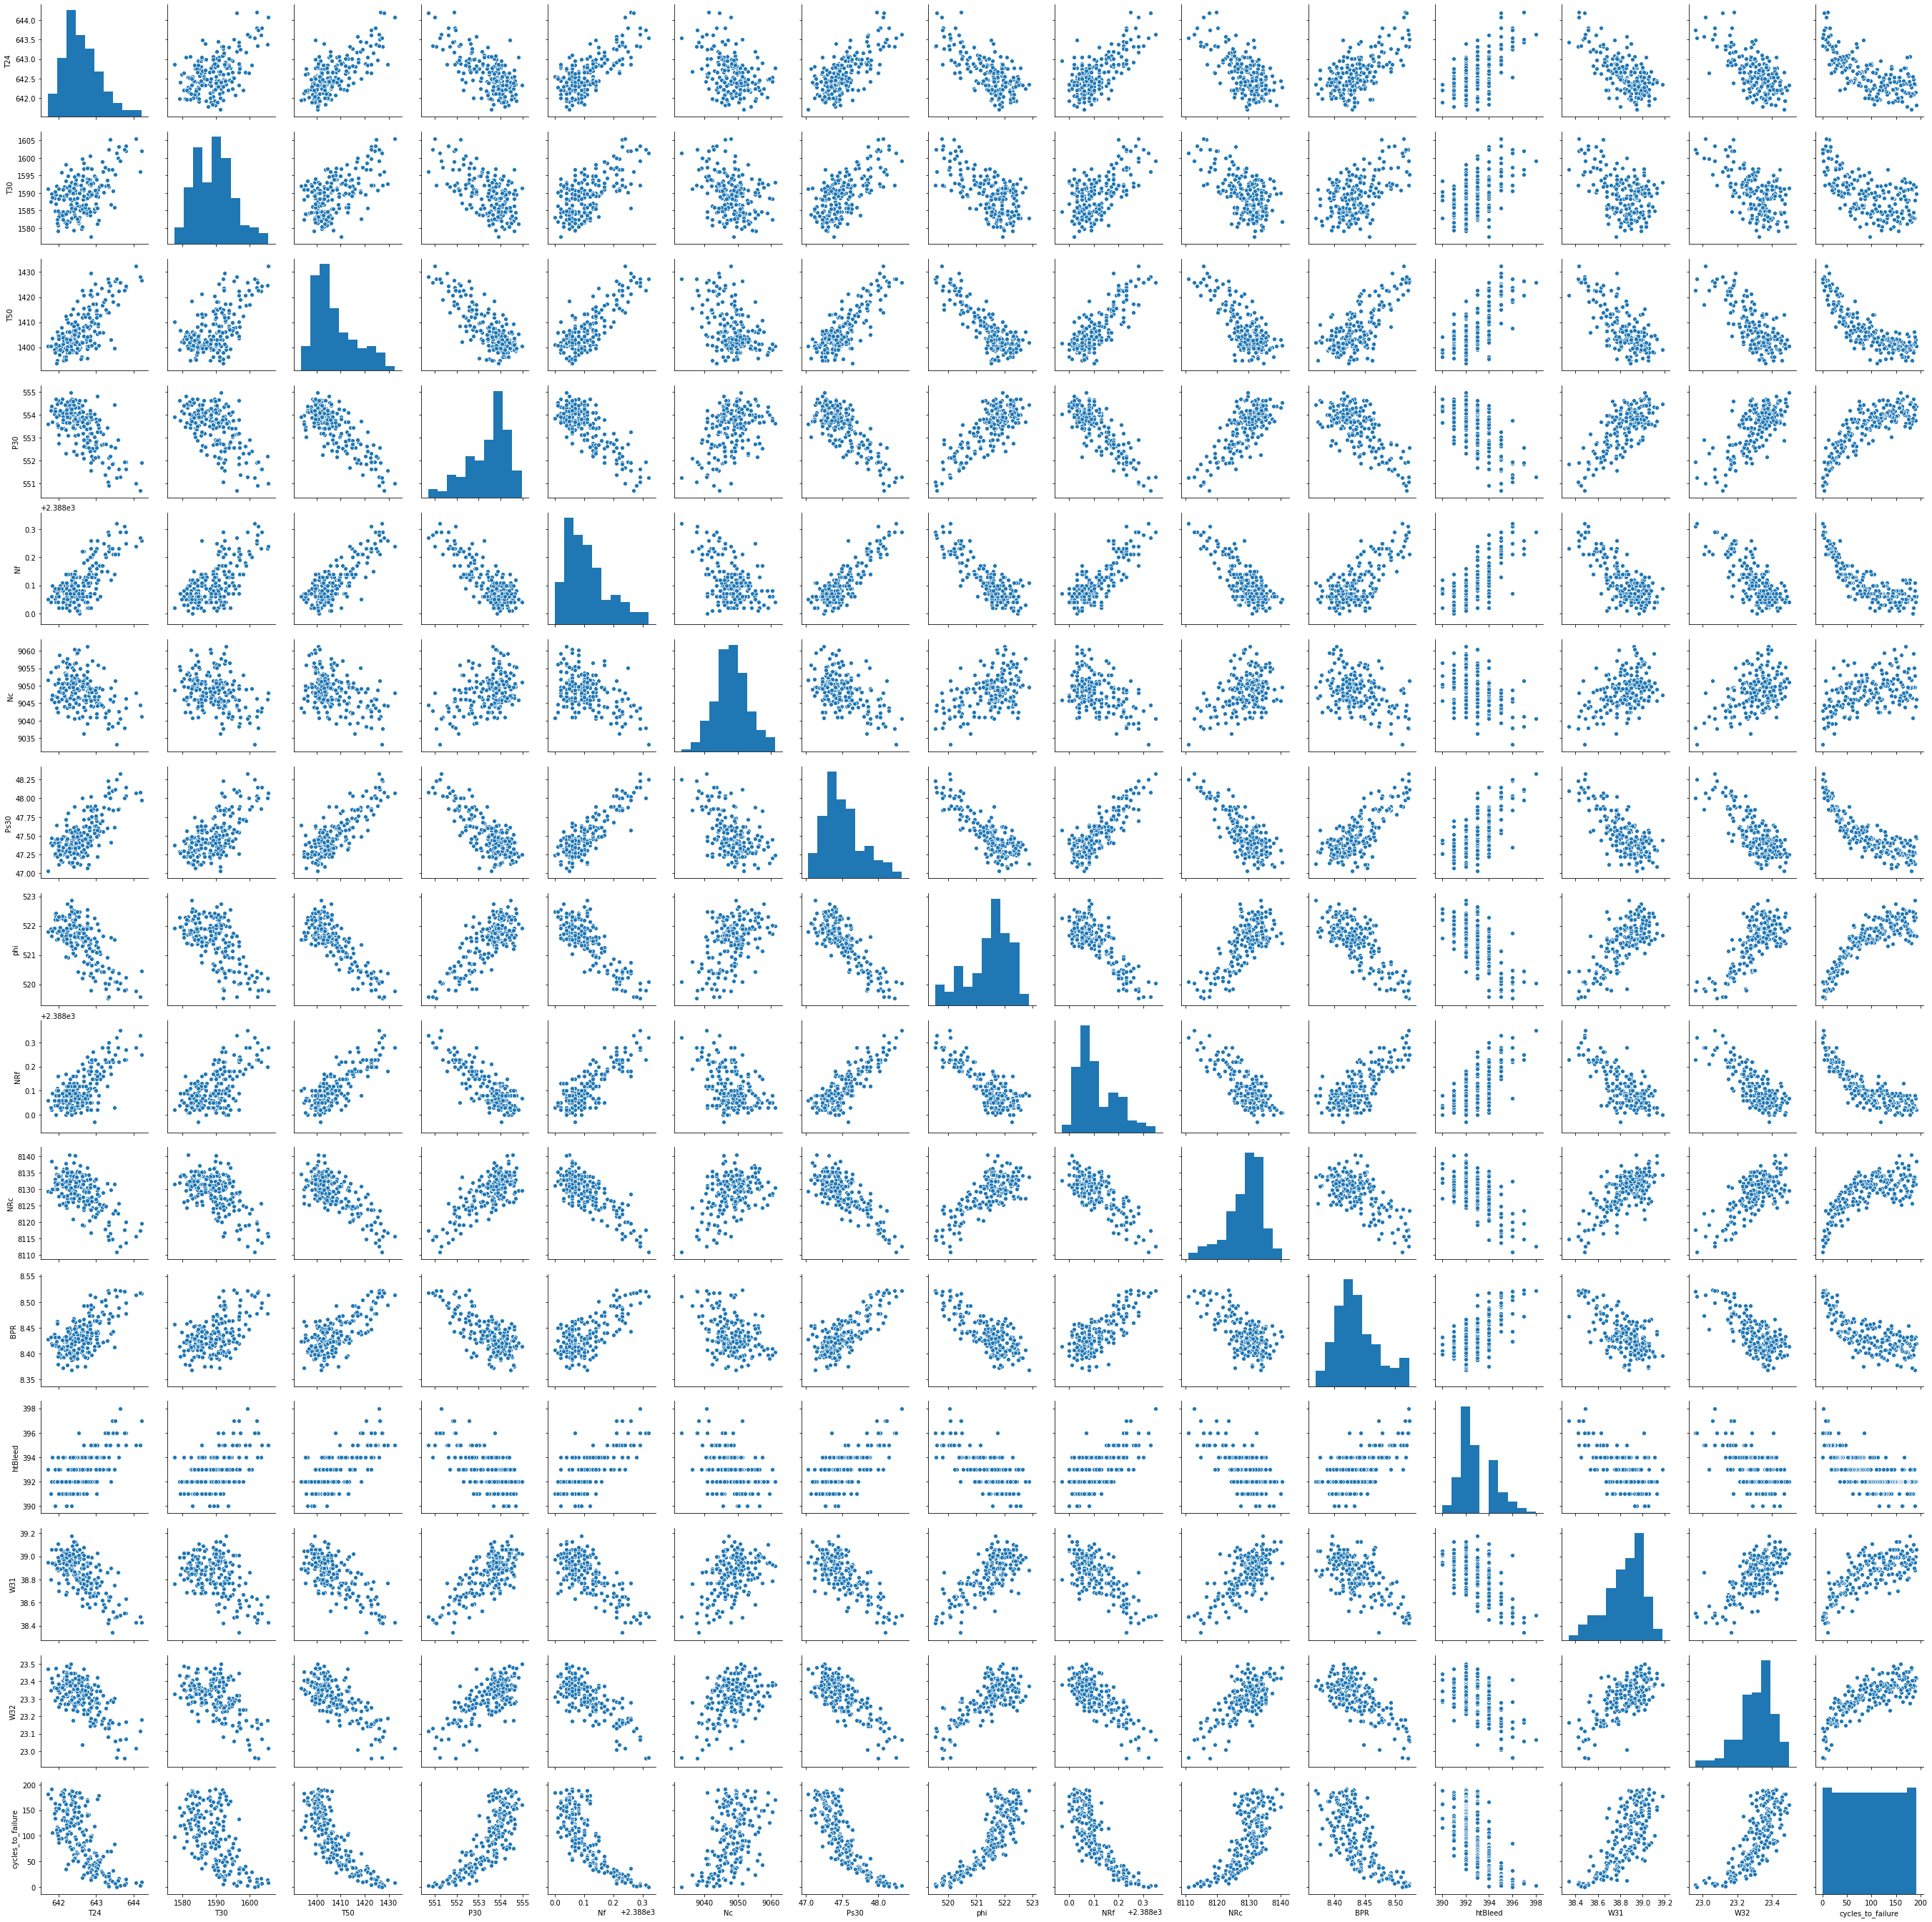

In [153]:
sns.pairplot(readings_no_op[readings_no_op['Engine id']==1].drop(labels=['Engine id','Cycle number'],axis=1))

In [154]:
def evaluate_rmse(y_true,y_pred):
    RMSE = round(np.sqrt(mean_squared_error(y_true,y_pred)),2)
    return RMSE

def evaluate(X_train,y_train,pred_train, X_val,y_train_test,pred_train_test, X_test = None,y_test = None,pred_test=None):
    e_null = y_train - y_train.mean()
    sst = np.sum(e_null**2)
    mst = sst/(len(X_train)-1)

    #train
    e = y_train - pred_train
    sse = np.sum(e**2)
    mse = sse/(len(X_train)-len(X_train.columns)-1)

    r_sqrd_train = 1 - mse/mst
    print('R_sqrd train: ',r_sqrd_train)
    print('rmse train: ',evaluate_rmse(y_train,pred_train))

    #validation
    e = y_train_test - pred_train_test
    sse = np.sum(e**2)
    mse = sse/(len(X_val)-len(X_train.columns)-1)

    r_sqrd_val = 1 - mse/mst
    print('R_sqrd train_test: ',r_sqrd_val)
    print('rmse train_test: ',evaluate_rmse(y_train_test,pred_train_test))

    if y_test is not None and pred_test is not None and X_test is not None:
        #test
        e = y_test - pred_test
        sse = np.sum(e**2)
        mse = sse/(len(X_test)-len(X_train.columns)-1)

        r_sqrd_test = 1 - mse/mst
        print('R_sqrd test: ',r_sqrd_test)
        print('rmse train_test: ',evaluate_rmse(y_test,pred_test))
        
        
    return r_sqrd_train, r_sqrd_val

In [155]:
X_train_no_op = readings_no_op.drop(labels=['Engine id','Cycle number','cycles_to_failure'],axis=1)
y_train = readings_no_op['cycles_to_failure']

In [156]:
engine_readings_test = pd.read_csv('''Data For Project/test_data.csv''')

    True RUL of the test set are only given from the last cycle and hence we will only predict the RUL from the last given cycle in the test set

In [157]:
X_test_no_op = engine_readings_test.groupby('Engine id').last().reset_index().drop(labels = no_change_cols+opr_cond,axis=1)
X_test_no_op = X_test_no_op.drop(labels=['Engine id','Cycle number'],axis=1)

In [158]:
y_test = pd.read_csv('''Data For Project/RUL_forecast_length.csv''')['Forecast Length']

In [120]:
no_preprocessing = pd.DataFrame(columns = ['Model','RMSE_kind','RMSE','R_sqrd_kind','R_sqrd'])

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [160]:
ols = sm.OLS(y_train,sm.add_constant(X_train_no_op)).fit()
ols.summary()

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cycles_to_failure   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1432.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:41:04   Log-Likelihood:                -49522.
No. Observations:                9909   AIC:                         9.907e+04
Df Residuals:                    9894   BIC:                         9.918e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.546e+04   3.25e+04      2.017      0.044    1839.495    1.29e+05
T24           -6.8270      1.166     -5.857      0.000      -9.112      -4.542
T30           -0.4219      0.089     -4.732      0.000      -0.597      -0.247
T50           -0.6935      0.086     -8.042      0.000      -0.863      -0.524
P30            5.9427      0.840      7.077      0.000       4.297       7.589
Nf            -6.6111     10.979     -0.602      0.547     -28.132      14.910
Nc            -0.3235      0.069     -4.714      0.000      -0.458      -0.189
Ps30         -37.9126      3.317    -11.428      0.000     -44.416     -31.410
phi           11.0271      1.117      9.869      0.000       8.837      13.217
NRf          -19.1758     10.770     -1.780      0.075     -40.288       1.937
NRc           -0.2413      0.078     -3.081      0.002      -0.395      -0.088
BPR         -112.8056     17.457     -6.462      0.000    -147.025     -78.587
htBleed       -1.7830      0.372     -4.791      0.000      -2.513      -1.054
W31           20.3788      3.486      5.845      0.000      13.545      27.213
W32           33.5196      5.901      5.680      0.000      21.953      45.086
==============================================================================
Omnibus:                      536.160   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.684
Skew:                           0.614   Prob(JB):                    8.27e-137
Kurtosis:                       3.093   Cond. No.                     1.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
readings_int = readings_no_op.groupby(by='Engine id').apply(lambda x: x.sample(1)).reset_index(drop=True).drop(labels=['Engine id','Cycle number'],axis=1)
X_train_for_testing = readings_int.drop(labels=['cycles_to_failure'],axis=1)
y_train_for_testing = readings_int['cycles_to_failure']

In [162]:
ols_train_pred = ols.predict(sm.add_constant(X_train_no_op))
ols_train_test_pred = ols.predict(sm.add_constant(X_train_for_testing))
ols_test_pred = ols.predict(sm.add_constant(X_test_no_op))
evaluate(X_train_no_op, y_train,ols_train_pred, X_train_for_testing,y_train_for_testing,ols_train_test_pred, X_test_no_op,y_test,ols_test_pred)

R_sqrd train:  0.6690209575646753
rmse train:  35.83
R_sqrd train_test:  0.5422907586597622
rmse train_test:  35.28
R_sqrd test:  0.5378960176664525
rmse train_test:  35.45


(0.6690209575646753, 0.5422907586597622)

In [125]:
no_preprocessing = no_preprocessing.append({'Model':'Linear Regression','RMSE_kind':'Train',
                        'RMSE':35.83,'R_sqrd_kind':'Train','R_sqrd':66.9},ignore_index=True)
no_preprocessing = no_preprocessing.append({'Model':'Linear Regression','RMSE_kind':'Test',
                         'RMSE':35.45,'R_sqrd_kind':'Test','R_sqrd':46.2},ignore_index=True)


##### SVR

In [29]:
svr = SVR(kernel='linear',epsilon=0.03,C=3)
svr.fit(X_train_no_op,y_train)
svr_train_pred = svr.predict(X_train_no_op)
svr_train_test_pred = svr.predict(X_train_for_testing)

In [30]:
evaluate(X_train_no_op,y_train,svr_train_pred, X_train_for_testing,y_train_for_testing,svr_train_test_pred)

R_sqrd train:  -0.47569254710565656
rmse train:  75.65
R_sqrd train_test:  2.331409166523113
rmse train_test:  79.62


In [126]:
no_preprocessing = no_preprocessing.append({'Model':'SVR-linear','RMSE_kind':'Train',
                         'RMSE':75.65,'R_sqrd_kind':'Train','R_sqrd':47.5},ignore_index=True)
no_preprocessing = no_preprocessing.append({'Model':'SVR-linear','RMSE_kind':'Test',
                         'RMSE':79.62,'R_sqrd_kind':'Test','R_sqrd':23.3},ignore_index=True)


In [32]:
for i in np.arange(0.3,0.35,0.01):
    print(i)
    svr = SVR(kernel='linear',epsilon=i,C=2)
    svr.fit(X_train_no_op,y_train)
    svr_train_pred = svr.predict(X_train_no_op)
    svr_train_test_pred = svr.predict(X_train_for_testing)
    print(evaluate(X_train_no_op,y_train,svr_train_pred, X_train_for_testing,y_train_for_testing,svr_train_test_pred))
    print('\n\n')

0.3
R_sqrd train:  0.3677226990003404
rmse train:  49.52
R_sqrd train_test:  0.8187862748971928
rmse train_test:  47.18
None



0.31
R_sqrd train:  0.3319009431604102
rmse train:  50.9
R_sqrd train_test:  0.9400332455689389
rmse train_test:  50.56
None



0.32
R_sqrd train:  0.35340546928226524
rmse train:  50.08
R_sqrd train_test:  0.8054246192110253
rmse train_test:  46.8
None



0.33
R_sqrd train:  0.2884065654647471
rmse train:  52.53
R_sqrd train_test:  1.3050944822779083
rmse train_test:  59.57
None



0.34
R_sqrd train:  0.29651845805923593
rmse train:  52.23
R_sqrd train_test:  1.0662327253695498
rmse train_test:  53.84
None





In [35]:
for i in np.arange(0.2,0.25,0.01):
    print(i)
    svr = SVR(kernel='rbf',epsilon=i)
    svr.fit(X_train_no_op,y_train)
    svr_train_pred = svr.predict(X_train_no_op)
    svr_train_test_pred = svr.predict(X_train_for_testing)
    print(evaluate(X_train_no_op,y_train,svr_train_pred, X_train_for_testing,y_train_for_testing,svr_train_test_pred))
    print('\n\n')

0.2
R_sqrd train:  -0.0024838197195440337
rmse train:  62.35
R_sqrd train_test:  1.6067181994058803
rmse train_test:  66.1
None



0.21000000000000002
R_sqrd train:  -0.0024980853244618295
rmse train:  62.36
R_sqrd train_test:  1.6067652398976557
rmse train_test:  66.1
None



0.22000000000000003
R_sqrd train:  -0.002512402496160915
rmse train:  62.36
R_sqrd train_test:  1.6068123539447463
rmse train_test:  66.1
None



0.23000000000000004
R_sqrd train:  -0.0025267712346415117
rmse train:  62.36
R_sqrd train_test:  1.6068595415471525
rmse train_test:  66.1
None



0.24000000000000005
R_sqrd train:  -0.002541191539902954
rmse train:  62.36
R_sqrd train_test:  1.6069068027048738
rmse train_test:  66.1
None





### Random Forests

In [39]:
for samples_split in range(10,50,10):
    for max_depth in range(4,10):
        print('Samples in split:{}, max_depth:{}'.format(samples_split,max_depth))
        rfr = RandomForestRegressor(min_samples_split=samples_split)
        rfr.fit(X_train_no_op,y_train)
        rfr_train_pred = rfr.predict(X_train_no_op)
        rfr_train_test_pred = rfr.predict(X_train_for_testing)
        evaluate(X_train_no_op,y_train,rfr_train_pred, X_train_for_testing,y_train_for_testing,rfr_train_test_pred)
        print('\n')

Samples in split:10, max_depth:4
R_sqrd train:  0.9301384528437047
rmse train:  16.46
R_sqrd train_test:  0.1136933586084093
rmse train_test:  17.58


Samples in split:10, max_depth:5
R_sqrd train:  0.9304835626324369
rmse train:  16.42
R_sqrd train_test:  0.11171530680924566
rmse train_test:  17.43


Samples in split:10, max_depth:6
R_sqrd train:  0.9300431641568392
rmse train:  16.47
R_sqrd train_test:  0.11449442595194106
rmse train_test:  17.64


Samples in split:10, max_depth:7
R_sqrd train:  0.9302844395760723
rmse train:  16.44
R_sqrd train_test:  0.10954565383005668
rmse train_test:  17.26


Samples in split:10, max_depth:8
R_sqrd train:  0.9303229760080005
rmse train:  16.44
R_sqrd train_test:  0.10242777890455759
rmse train_test:  16.69


Samples in split:10, max_depth:9
R_sqrd train:  0.9308092729550232
rmse train:  16.38
R_sqrd train_test:  0.11752186816624288
rmse train_test:  17.88


Samples in split:20, max_depth:4
R_sqrd train:  0.8891286175588056
rmse train:  20.74
R_s

In [127]:
no_preprocessing = no_preprocessing.append({'Model':'RandomForest','RMSE_kind':'Train',
                         'RMSE':24.7,'R_sqrd_kind':'Train','R_sqrd':84.26},ignore_index=True)
no_preprocessing = no_preprocessing.append({'Model':'RandomForest','RMSE_kind':'Test',
                         'RMSE':35.51,'R_sqrd_kind':'Test','R_sqrd':52.4},ignore_index=True)


In [164]:
np.sqrt(mean_squared_error(y_train,rf.predict(X_train_no_op)))

27.15948666041144

In [163]:
rf = RandomForestRegressor(min_samples_split=20,max_depth=9)
rf.fit(X_train_no_op,y_train)
pred = rf.predict(X_test_no_op)

np.sqrt(mean_squared_error(y_test,pred))

35.06855518840806

In [165]:
r2_score(y_train,rf.predict(X_train_no_op))

0.8100807218693922

In [167]:
e = y_test - rf.predict(X_test_no_op)
sse = np.sum(e**2)
mse = sse/(len(X_train_no_op)-len(X_train_no_op.columns)-1)

e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train_no_op)-1)

r_sqrd = 1 - mse/mst
r_sqrd

0.9984000148515365

In [51]:
rf.feature_importances_

array([0.00824757, 0.00696685, 0.14774808, 0.02137755, 0.00844175,
       0.11567769, 0.57574785, 0.04802725, 0.01279711, 0.02279709,
       0.01250045, 0.00334299, 0.00745841, 0.00886935])

In [52]:
X_train_no_op.columns

Index(['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'htBleed', 'W31', 'W32'],
      dtype='object')

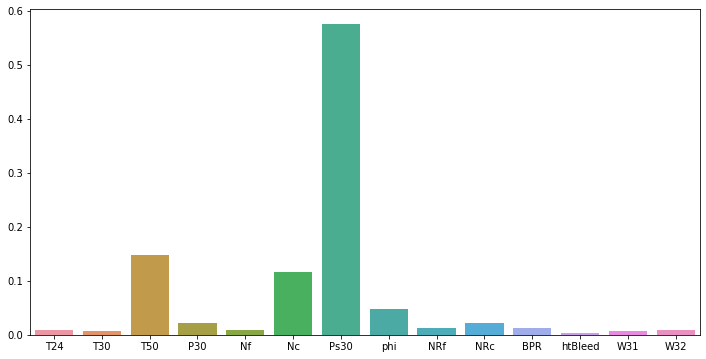

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(X_train_no_op.columns,rf.feature_importances_)
plt.xlabel('Feature Name')
plt.ylabel('RF importance')
plt.title('Feature importances')

In [ ]:
R_sqrd train:  0.6533493211503281
rmse train:  36.67
R_sqrd train_test:  0.5829729837458997
rmse train_test:  39.81
R_sqrd test:  0.4791430753544844
rmse train_test:  36.09

In [176]:
feat_selection = pd.DataFrame(columns = ['Model','RMSE_kind','RMSE','R_sqrd_kind','R_sqrd'])

feat_selection = feat_selection.append({'Model':'Linear Regression','RMSE_kind':'Train',
                        'RMSE':38.02,'R_sqrd_kind':'Train','R_sqrd':62.73},ignore_index=True)
feat_selection = feat_selection.append({'Model':'Linear Regression','RMSE_kind':'Test',
                         'RMSE':37.24,'R_sqrd_kind':'Test','R_sqrd':51},ignore_index=True)

feat_selection = feat_selection.append({'Model':'Lasso','RMSE_kind':'Train',
                         'RMSE':36.67,'R_sqrd_kind':'Train','R_sqrd':65.33},ignore_index=True)
feat_selection = feat_selection.append({'Model':'Lasso','RMSE_kind':'Test',
                         'RMSE':36.09,'R_sqrd_kind':'Test','R_sqrd':47.91},ignore_index=True)

feat_selection = feat_selection.append({'Model':'RandomForest','RMSE_kind':'Train',
                         'RMSE':27.15,'R_sqrd_kind':'Train','R_sqrd':81},ignore_index=True)
feat_selection = feat_selection.append({'Model':'RandomForest','RMSE_kind':'Test',
                         'RMSE':35.06,'R_sqrd_kind':'Test','R_sqrd':62.7},ignore_index=True)


feat_selection

Model RMSE_kind   RMSE R_sqrd_kind  R_sqrd
0  Linear Regression     Train  38.02       Train   62.73
1  Linear Regression      Test  37.24        Test   51.00
2              Lasso     Train  36.67       Train   65.33
3              Lasso      Test  36.09        Test   47.91
4       RandomForest     Train  27.15       Train   81.00
5       RandomForest      Test  35.06        Test   62.70

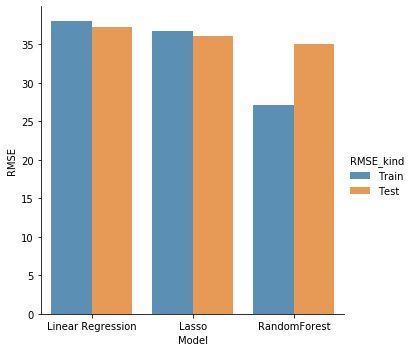

In [177]:
sns.catplot(data=feat_selection,x='Model',y='RMSE',hue='RMSE_kind',kind='bar',alpha=0.8)

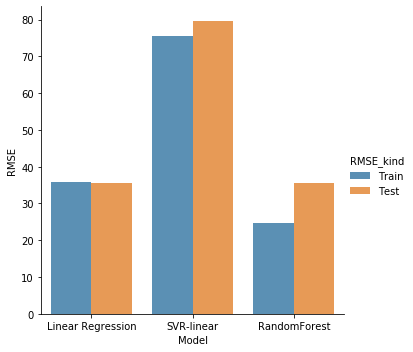

In [133]:
sns.catplot(data=no_preprocessing,x='Model',y='RMSE',hue='RMSE_kind',kind='bar',alpha=0.8)

##### OLS remove insignificant features

In [51]:
feat_to_remove = ['Nf','NRf']
ols_1 = sm.OLS(y_train,sm.add_constant(X_train_no_op.drop(labels=feat_to_remove,axis=1))).fit()

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cycles_to_failure   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1669.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:25:30   Log-Likelihood:                -49524.
No. Observations:                9909   AIC:                         9.907e+04
Df Residuals:                    9896   BIC:                         9.917e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3556.5759   1132.896      3.139      0.002    1335.870    5777.282
T24           -7.0704      1.159     -6.101      0.000      -9.342      -4.799
T30           -0.4352      0.089     -4.896      0.000      -0.609      -0.261
T50           -0.7217      0.085     -8.492      0.000      -0.888      -0.555
P30            6.2080      0.828      7.500      0.000       4.585       7.830
Nc            -0.3189      0.069     -4.649      0.000      -0.453      -0.184
Ps30         -39.2547      3.241    -12.113      0.000     -45.607     -32.902
phi           11.4365      1.098     10.414      0.000       9.284      13.589
NRc           -0.2166      0.077     -2.805      0.005      -0.368      -0.065
BPR         -116.5066     17.338     -6.720      0.000    -150.493     -82.521
htBleed       -1.8541      0.370     -5.007      0.000      -2.580      -1.128
W31           21.1050      3.467      6.087      0.000      14.308      27.902
W32           34.9238      5.858      5.962      0.000      23.442      46.406
==============================================================================
Omnibus:                      529.053   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.132
Skew:                           0.610   Prob(JB):                    9.80e-135
Kurtosis:                       3.091   Cond. No.                     3.91e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
ols1_train_pred = ols_1.predict(sm.add_constant(X_train_no_op.drop(labels=feat_to_remove,axis=1)))
ols1_train_test_pred = ols_1.predict(sm.add_constant(X_train_for_testing.drop(labels=feat_to_remove,axis=1)))
ols1_test_pred = ols_1.predict(sm.add_constant(X_test_no_op.drop(labels=feat_to_remove,axis=1)))
evaluate(X_train_no_op,y_train,ols1_train_pred, X_train_for_testing,y_train_for_testing,ols1_train_test_pred, X_test_no_op,y_test,ols1_test_pred)


R_sqrd train:  0.668879065557239
rmse train:  35.84
R_sqrd train_test:  0.4588347559959416
rmse train_test:  35.32
R_sqrd test:  0.4632936947302912
rmse train_test:  35.49


### Feature selection

In [55]:
from sklearn.feature_selection import RFE

##### Linear Regression RFE

In [56]:
lr = LinearRegression()
rfe = RFE(estimator = lr)
rfe.fit(X_train_no_op,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [57]:
X_train_no_op.columns[rfe.get_support()]

Index(['Nf', 'Ps30', 'phi', 'NRf', 'BPR', 'W31', 'W32'], dtype='object')

In [58]:
rfe_train_pred = rfe.predict(X_train_no_op)
rfe_train_test_pred = rfe.predict(X_train_for_testing)
rfe_test_pred = rfe.predict(X_test_no_op)

evaluate(X_train_no_op,y_train,rfe_train_pred, X_train_for_testing,y_train_for_testing,rfe_train_test_pred, X_test_no_op,y_test,rfe_test_pred)

R_sqrd train:  0.6273216770902311
rmse train:  38.02
R_sqrd train_test:  0.5377645383916156
rmse train_test:  38.24
R_sqrd test:  0.5100485730090003
rmse train_test:  37.24


##### Lasso

In [63]:
from sklearn.linear_model import Lasso
lrl = Lasso()

In [64]:
lrl.fit(X_train_no_op,y_train)
lrl.coef_

array([-5.22352516, -0.92551139, -1.67981186, 10.0774794 , -0.        ,
       -0.53391796, -0.        , 15.76312875, -0.        ,  0.        ,
       -0.        , -3.37966717,  0.        ,  0.        ])

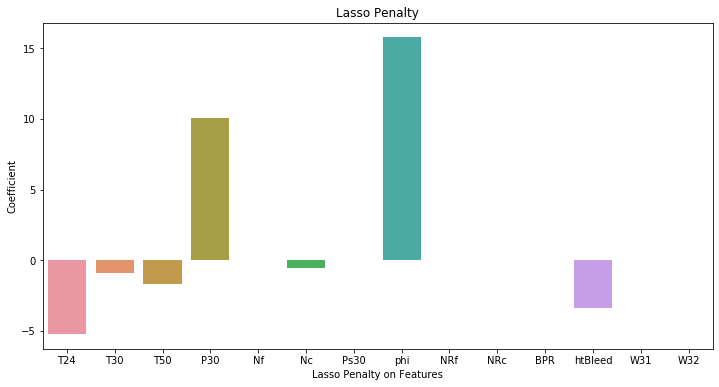

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(x=X_train_no_op.columns,y=lrl.coef_)
plt.xlabel('Lasso Penalty on Features')
plt.ylabel('Coefficient')
plt.title('Lasso Penalty')
plt.show()

In [68]:
lrl_train_pred = lrl.predict(X_train_no_op)
lrl_train_test_pred = lrl.predict(X_train_for_testing)
lrl_test_pred = lrl.predict(X_test_no_op)
evaluate(X_train_no_op,y_train,lrl_train_pred, X_train_for_testing,y_train_for_testing,lrl_train_test_pred, X_test_no_op,y_test,lrl_test_pred)


R_sqrd train:  0.6533493211503281
rmse train:  36.67
R_sqrd train_test:  0.5829729837458997
rmse train_test:  39.81
R_sqrd test:  0.4791430753544844
rmse train_test:  36.09


### Include operation conditions 1 and 2

In [29]:
readings_int = readings_no_op.groupby(by='Engine id').apply(lambda x: x.sample(1)).reset_index(drop=True).drop(labels=['Engine id','Cycle number'],axis=1)
X_train_for_testing = readings_int.drop(labels=['cycles_to_failure'],axis=1)
y_train_for_testing = readings_int['cycles_to_failure']

In [70]:
readings_op = engine_readings.drop(labels=no_change_cols+opr_cond[-2:],axis=1).copy()

calculate_cycles_to_failure = lambda row: cycles_each_engine[row['Engine id']] - row['Cycle number']
readings_op['cycles_to_failure'] = readings_op[['Engine id','Cycle number']].apply(calculate_cycles_to_failure,axis=1)

X_train_op = readings_op.drop(labels=['Engine id','Cycle number','cycles_to_failure'],axis=1)



X_test_op = engine_readings_test.groupby('Engine id').last().reset_index().drop(labels = no_change_cols+opr_cond,axis=1)
X_test_op = X_test_op.drop(labels=['Engine id','Cycle number'],axis=1)


In [71]:
lr_op = sm.OLS(y_train,sm.add_constant(X_train_op)).fit()
lr_op.summary()

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cycles_to_failure   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:25:22   Log-Likelihood:                -49520.
No. Observations:                9909   AIC:                         9.907e+04
Df Residuals:                    9893   BIC:                         9.919e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.319e+04   3.25e+04      1.946      0.052    -452.365    1.27e+05
Operation Condition 1   350.1532    164.630      2.127      0.033      27.444     672.862
T24                      -6.8192      1.165     -5.851      0.000      -9.104      -4.535
T30                      -0.4178      0.089     -4.685      0.000      -0.593      -0.243
T50                      -0.6969      0.086     -8.081      0.000      -0.866      -0.528
P30                       5.9509      0.840      7.088      0.000       4.305       7.597
Nf                       -6.1645     10.979     -0.561      0.574     -27.686      15.357
Nc                       -0.3233      0.069     -4.712      0.000      -0.458      -0.189
Ps30                    -38.1404      3.319    -11.493      0.000     -44.646     -31.635
phi                      10.9900      1.117      9.837      0.000       8.800      13.180
NRf                     -18.6742     10.771     -1.734      0.083     -39.788       2.439
NRc                      -0.2402      0.078     -3.067      0.002      -0.394      -0.087
BPR                    -112.6991     17.454     -6.457      0.000    -146.912     -78.486
htBleed                  -1.7799      0.372     -4.784      0.000      -2.509      -1.051
W31                      20.4227      3.486      5.859      0.000      13.590      27.256
W32                      33.8729      5.902      5.739      0.000      22.303      45.442
==============================================================================
Omnibus:                      535.150   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.327
Skew:                           0.614   Prob(JB):                    1.63e-136
Kurtosis:                       3.093   Cond. No.                     1.16e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
lr_temp = LinearRegression()
lr_temp.fit(X_train_op,y_train)
pred = lr_temp.predict(X_train_op)

In [73]:
np.sqrt(mean_squared_error(y_train,pred))

35.82044377108207

Text(0.5, 1.0, 'Distribution of Cycles to failure')

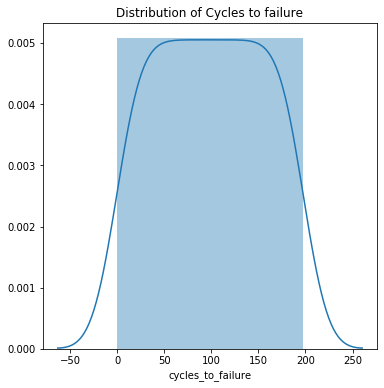

In [108]:
plt.figure(figsize=(6,6))
sns.distplot(readings_op[readings_op['Engine id']==50]['cycles_to_failure'],kde=True)
plt.title('Distribution of Cycles to failure')

### Clip the Y_train

In [84]:
y_train_clip = y_train.clip(upper=100)
y_train_for_testing_clip = y_train_for_testing.clip(upper=100)

In [82]:
lr = LinearRegression()
lr.fit(X_train_no_op,y_train_clip)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lr_train_pred_clip = lr.predict(X_train_no_op)
lr_train_test_pred_clip = lr.predict(X_train_for_testing)
lr_test_pred_clip = lr.predict(X_test_no_op)

In [123]:

for i in range(95,130,3):
    lr = RandomForestRegressor(min_samples_split=50,max_depth=7)
    y_train_clip = y_train.clip(upper=i)
    #y_train_for_testing_clip = y_train_for_testing.clip(upper=i)
    #y_test_clip = y_test.clip(upper=i)
    lr.fit(X_train_no_op,y_train_clip)
    print('Clipping at: ',i)
    a, b = evaluate(X_train_no_op,y_train_clip,lr.predict(X_train_no_op), X_test_no_op,y_test,lr.predict(X_test_no_op))#X_train_for_testing,y_train_for_testing_clip,lr.predict(X_train_for_testing))#
    r_sqrd_trains.append(a)
    r_sqrd_tests.append(b)
    print()

Clipping at:  95
R_sqrd train:  0.8903660421994924
rmse train:  10.12
R_sqrd train_test:  0.12101984206567595
rmse train_test:  23.99

Clipping at:  98
R_sqrd train:  0.8868603609251153
rmse train:  10.67
R_sqrd train_test:  0.15635312634280263
rmse train_test:  24.4

Clipping at:  101
R_sqrd train:  0.8836096018074916
rmse train:  11.22
R_sqrd train_test:  0.21691681200634882
rmse train_test:  24.37

Clipping at:  104
R_sqrd train:  0.8799861765863111
rmse train:  11.79
R_sqrd train_test:  0.26268390100596484
rmse train_test:  24.47

Clipping at:  107
R_sqrd train:  0.8757849220855922
rmse train:  12.4
R_sqrd train_test:  0.3037673516293349
rmse train_test:  24.58

Clipping at:  110
R_sqrd train:  0.8717205904730594
rmse train:  13.01
R_sqrd train_test:  0.3176609545059639
rmse train_test:  25.11

Clipping at:  113
R_sqrd train:  0.8686940070292434
rmse train:  13.56
R_sqrd train_test:  0.36521383121154494
rmse train_test:  24.97

Clipping at:  116
R_sqrd train:  0.863840365434938
rms

In [151]:
rmse_test = list()
r_sqrd_test = list()

for i in range(90,125,3):
    rfr_clip = RandomForestRegressor(min_samples_split=50,max_depth=7)
    rfr_clip.fit(X_train_no_op,y_train.clip(upper=i))
    rfr_clip_test_pred = rfr_clip.predict(X_test_no_op)
    rmse_test.append(np.sqrt(mean_squared_error(y_test,rfr_clip_test_pred)))
    
    
    e_null = y_train - y_train.mean()
    sst = np.sum(e_null**2)
    mst = sst/(len(X_train_no_op)-len(X_train_no_op.columns)-1)

    e = y_test - rfr_clip_test_pred
    sse = np.sum(e**2)
    mse = sse/(len(X_train_for_testing)-len(X_train_for_testing.columns)-1)
    r_sqrd = 1 - mse/mst
    
    r_sqrd_test.append(r_sqrd)

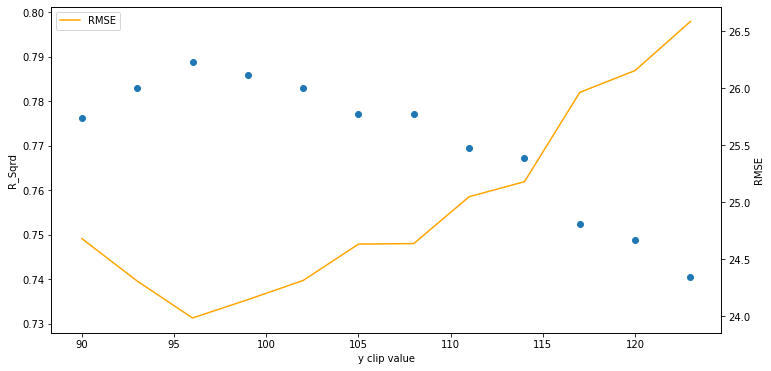

In [153]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.scatter(range(90,125,3),r_sqrd_test,label='r_sqrd')
ax2 = ax.twinx()
ax2.plot(range(90,125,3),rmse_test,color='orange',label='RMSE')


ax.set_xlabel('y clip value')
#ax.set_ylim(0.434,0.44)
ax.set_ylabel('R_Sqrd')
ax2.set_ylabel('RMSE')
plt.legend()
plt.show()

    At 96 clip level, there's max variance capured and least RMSE. So clip at 96 is ideal

In [156]:
rfr_clip = RandomForestRegressor(min_samples_split=60,max_depth=7)
rfr_clip.fit(X_train_no_op,y_train.clip(upper=96))
rfr_clip_test_pred = rfr_clip.predict(X_test_no_op)

e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train_no_op)-len(X_train_no_op.columns)-1)

e = y_test - rfr_clip_test_pred
sse = np.sum(e**2)
mse = sse/(len(X_train_for_testing)-len(X_train_for_testing.columns)-1)
r_sqrd = 1 - mse/mst

np.sqrt(mean_squared_error(y_test,rfr_clip_test_pred)),r_sqrd

(24.212228367921917, 0.784702246996799)

### Interactions

In [157]:
readings_no_op

Engine id  Cycle number     T24      T30      T50     P30       Nf  \
0             1             1  641.82  1589.70  1400.60  554.36  2388.06   
1             1             2  642.15  1591.82  1403.14  553.75  2388.04   
2             1             3  642.35  1587.99  1404.20  554.26  2388.08   
3             1             4  642.35  1582.79  1401.87  554.45  2388.11   
4             1             5  642.37  1582.85  1406.22  554.00  2388.06   
...         ...           ...     ...      ...      ...     ...      ...   
9904         50           194  643.77  1604.93  1423.51  551.41  2388.18   
9905         50           195  643.33  1605.31  1434.87  551.25  2388.17   
9906         50           196  643.32  1602.26  1430.01  551.40  2388.19   
9907         50           197  643.73  1599.94  1432.87  551.18  2388.19   
9908         50           198  643.83  1608.20  1433.88  552.06  2388.20   

           Nc   Ps30     phi      NRf      NRc     BPR  htBleed    W31  \
0     9046.19  47.47  521.66  2388.02  8138.62  8.4195      392  39.06   
1     9044.07  47.49  522.28  2388.07  8131.49  8.4318      392  39.00   
2     9052.94  47.27  522.42  2388.03  8133.23  8.4178      390  38.95   
3     9049.48  47.13  522.86  2388.08  8133.83  8.3682      392  38.88   
4     9055.15  47.28  522.19  2388.04  8133.80  8.4294      393  38.90   
...       ...    ...     ...      ...      ...     ...      ...    ...   
9904  9128.75  48.16  519.85  2388.19  8194.20  8.5043      396  38.42   
9905  9134.70  48.14  519.33  2388.21  8200.90  8.5352      395  38.45   
9906  9129.59  48.24  519.88  2388.17  8194.10  8.5034      395  38.45   
9907  9132.97  48.22  519.48  2388.20  8194.64  8.5241      397  38.52   
9908  9128.91  48.01  520.00  2388.25  8200.20  8.5002      396  38.43   

          W32  cycles_to_failure  
0     23.4190                191  
1     23.4236                190  
2     23.3442                189  
3     23.3739                188  
4     23.4044                187  
...       ...                ...  
9904  23.0543                  4  
9905  23.0191                  3  
9906  23.0379                  2  
9907  23.0832                  1  
9908  23.1086                  0  

[9909 rows x 17 columns]

##### LinearRegression interactions

In [198]:
ols_f = smf.ols(formula = '''cycles_to_failure ~ 1 + T24 + T30 + T50 + P30 + Nf + Nc + Ps30 + phi + NRf + NRc
+ BPR + htBleed + W31 + W32 + T24 * T30 + T24 * T50 + T24 * P30 + T24 * Nf + T24 * Nc + T24 * Ps30''',data=readings_no_op).fit()
ols_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cycles_to_failure   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     1255.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:48:38   Log-Likelihood:                -48928.
No. Observations:                9909   AIC:                         9.790e+04
Df Residuals:                    9889   BIC:                         9.804e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.367e+07   2.62e+07      0.905      0.365   -2.76e+07    7.49e+07
T24        -3.647e+04   4.07e+04     -0.896      0.370   -1.16e+05    4.33e+04
T30          -98.5679    103.283     -0.954      0.340    -301.024     103.888
T50            8.2647     96.291      0.086      0.932    -180.486     197.015
P30          821.3108    951.930      0.863      0.388   -1044.667    2687.288
Nf         -7431.6020   1.09e+04     -0.681      0.496   -2.88e+04    1.39e+04
Nc          -625.6258     22.085    -28.328      0.000    -668.917    -582.335
Ps30       -9246.4349   3493.722     -2.647      0.008   -1.61e+04   -2398.028
phi           10.5023      1.054      9.964      0.000       8.436      12.568
NRf          -49.9488     10.258     -4.869      0.000     -70.056     -29.842
NRc           -0.6726      0.075     -8.977      0.000      -0.820      -0.526
BPR         -106.8350     16.457     -6.492      0.000    -139.094     -74.576
htBleed       -1.8718      0.351     -5.337      0.000      -2.559      -1.184
W31           18.3689      3.287      5.589      0.000      11.926      24.812
W32           31.0348      5.563      5.579      0.000      20.130      41.940
T24:T30        0.1527      0.161      0.950      0.342      -0.162       0.468
T24:T50       -0.0138      0.150     -0.092      0.927      -0.307       0.280
T24:P30       -1.2685      1.481     -0.856      0.392      -4.172       1.635
T24:Nf        11.4907     16.968      0.677      0.498     -21.769      44.751
T24:Nc         0.9726      0.034     28.312      0.000       0.905       1.040
T24:Ps30      14.3291      5.436      2.636      0.008       3.673      24.985
==============================================================================
Omnibus:                      623.655   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              754.991
Skew:                           0.633   Prob(JB):                    1.14e-164
Kurtosis:                       3.474   Cond. No.                     4.77e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-12. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
temp_data = X_train_no_op.copy()
temp_data1 = X_test_no_op.copy()
#T24 * T30 + T24 * T50 + T24 * P30 + T24 * Nf + T24 * Nc + T24 * Ps30
temp_data['T24 * T30'] = temp_data['T24'] * temp_data['T30'] 
temp_data['T24 * T50'] = temp_data['T24'] * temp_data['T50']
temp_data['T24 * P30'] = temp_data['T24'] * temp_data['P30']
temp_data['T24 * Nf'] = temp_data['T24'] * temp_data['Nf']
temp_data['T24 * Nc'] = temp_data['T24'] * temp_data['Nc']
temp_data['T24 * Ps30'] = temp_data['T24'] * temp_data['Ps30']

temp_data1['T24 * T30'] = temp_data1['T24'] * temp_data1['T30'] 
temp_data1['T24 * T50'] = temp_data1['T24'] * temp_data1['T50']
temp_data1['T24 * P30'] = temp_data1['T24'] * temp_data1['P30']
temp_data1['T24 * Nf'] = temp_data1['T24'] * temp_data1['Nf']
temp_data1['T24 * Nc'] = temp_data1['T24'] * temp_data1['Nc']
temp_data1['T24 * Ps30'] = temp_data1['T24'] * temp_data1['Ps30']

In [200]:
ols_f_train_pred = ols_f.predict(sm.add_constant(temp_data))
ols_f_test_pred = ols_f.predict(sm.add_constant(temp_data1))
np.sqrt(mean_squared_error(y_train,ols_f_train_pred)),np.sqrt(mean_squared_error(y_test,ols_f_test_pred))

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(33.743650192356895, 34.105784701483984)

In [189]:
interactions_manual = pd.DataFrame(columns = ['Model','RMSE_kind','RMSE'])

interactions_manual = interactions_manual.append({'Model':'Linear Regression','RMSE_kind':'Train',
                        'RMSE':33.74},ignore_index=True)
interactions_manual = interactions_manual.append({'Model':'Linear Regression','RMSE_kind':'Test',
                         'RMSE':34.10},ignore_index=True)

interactions_manual = interactions_manual.append({'Model':'Lasso','RMSE_kind':'Train',
                         'RMSE':36.21},ignore_index=True)
interactions_manual = interactions_manual.append({'Model':'Lasso','RMSE_kind':'Test',
                         'RMSE':38.09},ignore_index=True)

interactions_manual = interactions_manual.append({'Model':'svr','RMSE_kind':'Train',
                         'RMSE':62.32},ignore_index=True)
interactions_manual = interactions_manual.append({'Model':'svr','RMSE_kind':'Test',
                         'RMSE':25.24},ignore_index=True)

interactions_manual = interactions_manual.append({'Model':'RandomForest','RMSE_kind':'Train',
                         'RMSE':29.98},ignore_index=True)
interactions_manual = interactions_manual.append({'Model':'RandomForest','RMSE_kind':'Test',
                         'RMSE':36.04},ignore_index=True)


interactions_manual

Model RMSE_kind   RMSE
0  Linear Regression     Train  33.74
1  Linear Regression      Test  34.10
2              Lasso     Train  36.21
3              Lasso      Test  38.09
4                svr     Train  62.32
5                svr      Test  25.24
6       RandomForest     Train  29.98
7       RandomForest      Test  36.04

Text(0.5, 1, 'Performance after Manual interactions with T24')

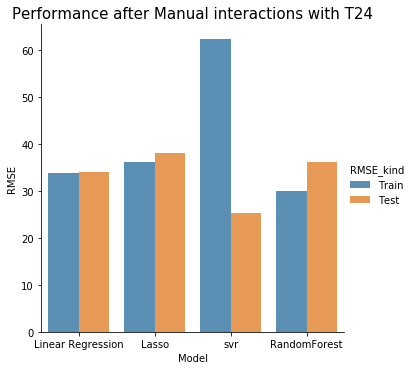

In [190]:
sns.catplot(data = interactions_manual,x='Model',y='RMSE',hue='RMSE_kind',kind='bar',alpha=0.8)
plt.title('Performance after Manual interactions with T24',fontsize=15)

##### Lasso interactions

In [ ]:
lr_int = Lasso()

In [223]:
for a in np.arange(0.5,1.5,0.1):
    print('alpha: ',a)
    est = Lasso(alpha=a)
    est.fit(temp_data,y_train)
    train_pred = est.predict(temp_data)
    val_pred = est.predict(temp_data2)
    print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
    print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
    print('\n')

alpha:  0.5


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5816313.956146969, tolerance: 3848.6098917347867
  positive)


train_rmse:  36.11760908042952
val_rmse:  37.669472294862985


alpha:  0.6


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6023068.037311244, tolerance: 3848.6098917347867
  positive)


train_rmse:  36.13291631523979
val_rmse:  37.750900320550635


alpha:  0.7


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6115246.524693441, tolerance: 3848.6098917347867
  positive)


train_rmse:  36.15075331933681
val_rmse:  37.83527108231763


alpha:  0.7999999999999999


/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6172540.18495852, tolerance: 3848.6098917347867
  positive)
/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6211324.034184054, tolerance: 3848.6098917347867
  positive)


train_rmse:  36.171120786641005
val_rmse:  37.922521934799725


alpha:  0.8999999999999999
train_rmse:  36.19401661836661
val_rmse:  38.012652423650906


alpha:  0.9999999999999999
train_rmse:  36.21936968220841
val_rmse:  38.09518595400744


alpha:  1.0999999999999999
train_rmse:  36.246246759879355
val_rmse:  38.189745678282364


alpha:  1.1999999999999997
train_rmse:  36.275660210711195
val_rmse:  38.28723289085563


alpha:  1.2999999999999998
train_rmse:  36.30760218263504
val_rmse:  38.3876500716764


alpha:  1.4
train_rmse:  36.3420705167871
val_rmse:  38.49089959445905




In [201]:
ols_f = smf.ols(formula = '''cycles_to_failure ~ 1 + T24 + T30 + T50 + P30 + Nf + Nc + Ps30 + phi + NRf + NRc
+ BPR + htBleed + W31 + W32 + T24 * T30 + T24 * T50 + T24 * P30 + T24 * Nf + T24 * Nc + T24 * Ps30''',data=readings_no_op).fit_regularized(L1_wt=1)

In [202]:
ols_f.params

Intercept    1.161604e+02
T24         -2.519146e-03
T30         -3.789857e-03
T50         -5.020081e-03
P30          3.307891e-02
Nf          -1.526681e-03
Nc          -3.468609e-04
Ps30        -2.126747e-01
phi          3.175920e-02
NRf         -1.385207e-03
NRc         -2.890325e-04
BPR         -8.569702e-01
htBleed      3.856562e-03
W31          4.648473e-01
W32          7.004958e-03
T24:T30     -1.892668e-05
T24:T50     -7.812463e-06
T24:P30      5.147956e-05
T24:Nf      -2.375925e-06
T24:Nc      -5.399339e-07
T24:Ps30    -3.309480e-04
dtype: float64

In [178]:
temp_data = X_train_no_op.copy() #train
temp_data2 = X_train_for_testing.copy() #validation
temp_data1 = X_test_no_op.copy() #testing
#T24 * T30 + T24 * T50 + T24 * P30 + T24 * Nf + T24 * Nc + T24 * Ps30
#train
temp_data['T24 * T30'] = temp_data['T24'] * temp_data['T30'] 
temp_data['T24 * T50'] = temp_data['T24'] * temp_data['T50']
temp_data['T24 * P30'] = temp_data['T24'] * temp_data['P30']
temp_data['T24 * Nf'] = temp_data['T24'] * temp_data['Nf']
temp_data['T24 * Nc'] = temp_data['T24'] * temp_data['Nc']
temp_data['T24 * Ps30'] = temp_data['T24'] * temp_data['Ps30']

#validation
temp_data2['T24 * T30'] = temp_data2['T24'] * temp_data2['T30'] 
temp_data2['T24 * T50'] = temp_data2['T24'] * temp_data2['T50']
temp_data2['T24 * P30'] = temp_data2['T24'] * temp_data2['P30']
temp_data2['T24 * Nf'] = temp_data2['T24'] * temp_data2['Nf']
temp_data2['T24 * Nc'] = temp_data2['T24'] * temp_data2['Nc']
temp_data2['T24 * Ps30'] = temp_data2['T24'] * temp_data2['Ps30']


#test
temp_data1['T24 * T30'] = temp_data1['T24'] * temp_data1['T30'] 
temp_data1['T24 * T50'] = temp_data1['T24'] * temp_data1['T50']
temp_data1['T24 * P30'] = temp_data1['T24'] * temp_data1['P30']
temp_data1['T24 * Nf'] = temp_data1['T24'] * temp_data1['Nf']
temp_data1['T24 * Nc'] = temp_data1['T24'] * temp_data1['Nc']
temp_data1['T24 * Ps30'] = temp_data1['T24'] * temp_data1['Ps30']


In [204]:
ols_f_train_pred = ols_f.predict(sm.add_constant(temp_data))
ols_f_test_pred = ols_f.predict(sm.add_constant(temp_data1))
np.sqrt(mean_squared_error(y_train,ols_f_train_pred)),np.sqrt(mean_squared_error(y_test,ols_f_test_pred))

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(61.947357664321494, 26.50412632623181)

In [225]:
for wt in np.arange(0.3,1,0.1):
    print('Lasso weight: ',wt)
    est = sm.OLS(y_train,temp_data).fit_regularized(L1_wt = wt)
    train_pred = est.predict(temp_data)
    val_pred = est.predict(temp_data2)
    print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
    print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
    print('\n')

Lasso weight:  0.3
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.4
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.5
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.6000000000000001
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.7000000000000002
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.8000000000000003
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184


Lasso weight:  0.9000000000000001
train_rmse:  62.00731281124687
val_rmse:  60.974219743884184




##### Support Vector Regressor interactions

In [179]:
svr_int = SVR(kernel='rbf',degree=2)
svr_int.fit(temp_data,y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [180]:
svr_int_train_pred = svr_int.predict(temp_data)
svr_int_test_pred = svr_int.predict(temp_data1)

np.sqrt(mean_squared_error(y_train,svr_int_train_pred)),np.sqrt(mean_squared_error(y_test,svr_int_test_pred))

(62.3225786954847, 25.243259971124303)

In [231]:
for eps in np.arange(0.1,0.5,0.1):
    for deg in range(1,4):
        print('epislon: ',eps)
        est = SVR(kernel='rbf',degree=deg,epsilon=eps)
        est.fit(temp_data,y_train)
        train_pred = est.predict(temp_data)
        val_pred = est.predict(temp_data2)
        print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
        print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
        print('\n')

epislon:  0.1
train_rmse:  62.3225786954847
val_rmse:  61.438571616074405


epislon:  0.1
train_rmse:  62.3225786954847
val_rmse:  61.438571616074405


epislon:  0.1
train_rmse:  62.3225786954847
val_rmse:  61.438571616074405


epislon:  0.2
train_rmse:  62.32695861180572
val_rmse:  61.44948348220851


epislon:  0.2
train_rmse:  62.32695861180572
val_rmse:  61.44948348220851


epislon:  0.2
train_rmse:  62.32695861180572
val_rmse:  61.44948348220851


epislon:  0.30000000000000004
train_rmse:  62.331498653093554
val_rmse:  61.46055611721168


epislon:  0.30000000000000004
train_rmse:  62.331498653093554
val_rmse:  61.46055611721168


epislon:  0.30000000000000004
train_rmse:  62.331498653093554
val_rmse:  61.46055611721168


epislon:  0.4
train_rmse:  62.33619878436175
val_rmse:  61.47178943420827


epislon:  0.4
train_rmse:  62.33619878436175
val_rmse:  61.47178943420827


epislon:  0.4
train_rmse:  62.33619878436175
val_rmse:  61.47178943420827




##### RandomForestRegressor interactions

In [187]:
rfr_int = RandomForestRegressor(min_samples_split=50,max_depth=7)
rfr_int.fit(temp_data,y_train)
rfr_int.feature_importances_

array([1.72942759e-04, 1.62556118e-03, 5.93964038e-03, 1.36832253e-02,
       3.37300669e-03, 2.92585656e-02, 2.18906281e-03, 3.15760776e-02,
       7.04902387e-03, 1.41027270e-02, 6.03807546e-03, 8.78547228e-04,
       2.84342032e-03, 5.21486044e-03, 1.66469585e-03, 1.60554217e-01,
       3.49804675e-03, 3.46499646e-04, 9.57974414e-02, 6.14194363e-01])

In [188]:
rfr_int_train_pred = rfr_int.predict(temp_data)
rfr_int_test_pred = rfr_int.predict(temp_data1)

np.sqrt(mean_squared_error(y_train,rfr_int_train_pred)),np.sqrt(mean_squared_error(y_test,rfr_int_test_pred))

(29.988721718179114, 36.04711995045044)

Text(0.5, 0, 'Feature Name')

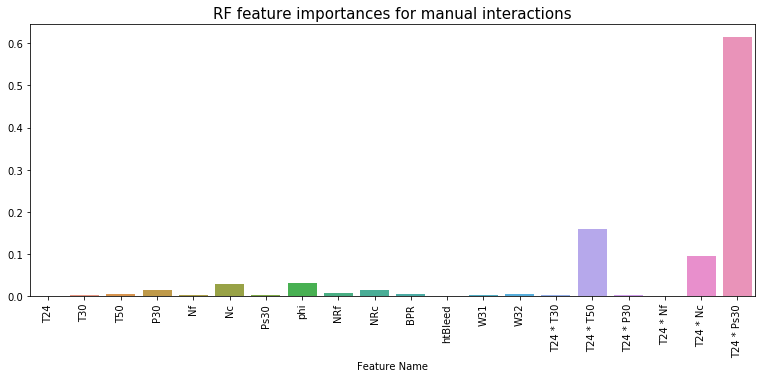

In [200]:
plt.figure(figsize=(13,5))
sns.barplot(x=temp_data.columns,y=rfr_int.feature_importances_)
plt.title('RF feature importances for manual interactions',fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Feature Name')

In [218]:
for min_smpls in range(30,70,10):
    for max_depth in range(5,9,1):
        print('min samples split: {}, max_depth: {}'.format(min_smpls,max_depth))
        est = RandomForestRegressor(min_samples_split=min_smpls,max_depth=max_depth)
        est.fit(temp_data,y_train)
        train_pred = est.predict(temp_data)
        val_pred = est.predict(temp_data2)
        print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
        print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
        print('\n')

min samples split: 30, max_depth: 5
train_rmse:  32.57935926630942
val_rmse:  32.84355907606594


min samples split: 30, max_depth: 6
train_rmse:  31.13784381844309
val_rmse:  31.183220573560142


min samples split: 30, max_depth: 7
train_rmse:  29.886380443142393
val_rmse:  29.96126619711897


min samples split: 30, max_depth: 8
train_rmse:  28.671792690253305
val_rmse:  28.876291176744857


min samples split: 40, max_depth: 5
train_rmse:  32.59668438672884
val_rmse:  32.38764536874308


min samples split: 40, max_depth: 6
train_rmse:  31.17934025018013
val_rmse:  31.43900860028615


min samples split: 40, max_depth: 7
train_rmse:  29.958018802201906
val_rmse:  30.096126580029562


min samples split: 40, max_depth: 8
train_rmse:  28.81874355727985
val_rmse:  29.039779570884633


min samples split: 50, max_depth: 5
train_rmse:  32.61586893922429
val_rmse:  33.52079727747824


min samples split: 50, max_depth: 6
train_rmse:  31.205665674034268
val_rmse:  31.590004896150433


min samples

In [219]:
rf = RandomForestRegressor(min_samples_split=30,max_depth=8)
rf.fit(temp_data,y_train)
rf_train_pred = rf.predict(temp_data1)
np.sqrt(mean_squared_error(y_test,rf_train_pred))

35.125266400923394

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
X_train_no_op

T24      T30      T50     P30       Nf       Nc   Ps30     phi  \
0     641.82  1589.70  1400.60  554.36  2388.06  9046.19  47.47  521.66   
1     642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49  522.28   
2     642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27  522.42   
3     642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13  522.86   
4     642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28  522.19   
...      ...      ...      ...     ...      ...      ...    ...     ...   
9904  643.77  1604.93  1423.51  551.41  2388.18  9128.75  48.16  519.85   
9905  643.33  1605.31  1434.87  551.25  2388.17  9134.70  48.14  519.33   
9906  643.32  1602.26  1430.01  551.40  2388.19  9129.59  48.24  519.88   
9907  643.73  1599.94  1432.87  551.18  2388.19  9132.97  48.22  519.48   
9908  643.83  1608.20  1433.88  552.06  2388.20  9128.91  48.01  520.00   

          NRf      NRc     BPR  htBleed    W31      W32  
0     2388.02  8138.62  8.4195      392  39.06  23.4190  
1     2388.07  8131.49  8.4318      392  39.00  23.4236  
2     2388.03  8133.23  8.4178      390  38.95  23.3442  
3     2388.08  8133.83  8.3682      392  38.88  23.3739  
4     2388.04  8133.80  8.4294      393  38.90  23.4044  
...       ...      ...     ...      ...    ...      ...  
9904  2388.19  8194.20  8.5043      396  38.42  23.0543  
9905  2388.21  8200.90  8.5352      395  38.45  23.0191  
9906  2388.17  8194.10  8.5034      395  38.45  23.0379  
9907  2388.20  8194.64  8.5241      397  38.52  23.0832  
9908  2388.25  8200.20  8.5002      396  38.43  23.1086  

[9909 rows x 14 columns]

In [33]:
readings_int = readings_no_op.groupby(by='Engine id').apply(lambda x: x.sample(1)).reset_index(drop=True).drop(labels=['Engine id','Cycle number'],axis=1)
X_val = readings_int.drop(labels=['cycles_to_failure'],axis=1)
y_val = readings_int['cycles_to_failure']

In [34]:
pf = PolynomialFeatures(degree=2)
train_set = pf.fit_transform(X_train_no_op)
val_set = pf.transform(X_val)
test_set = pf.transform(X_test_no_op)

In [36]:
from sklearn.linear_model import Lasso
lr_pf = Lasso()
lr_pf.fit(train_set,y_train)
lr_pf_pred_train = lr_pf.predict(train_set)
lr_pf_pred_test = lr_pf.predict(test_set)

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6281295.335899499, tolerance: 3848.6098917347867
  positive)


In [184]:
rf = RandomForestRegressor(min_samples_split=50,max_depth=7)
rf.fit(train_set,y_train)
rf_pred_train = rf.predict(train_set)
rf_pred_test = rf.predict(test_set)

In [188]:
np.sqrt(mean_squared_error(y_train,rf_pred_train)),np.sqrt(mean_squared_error(y_test,rf_pred_test))

(29.027723248767387, 34.54529960026545)

In [232]:
for min_smpls in range(30,70,10):
    for max_depth in range(5,9,1):
        print('min samples split: {}, max_depth: {}'.format(min_smpls,max_depth))
        est = RandomForestRegressor(min_samples_split=min_smpls,max_depth=max_depth)
        est.fit(train_set,y_train)
        train_pred = est.predict(train_set)
        val_pred = est.predict(val_set)
        print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
        print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
        print('\n')

min samples split: 30, max_depth: 5
train_rmse:  31.39461505082696
val_rmse:  76.19103572407214


min samples split: 30, max_depth: 6
train_rmse:  30.08723756787797
val_rmse:  76.36158316562344


min samples split: 30, max_depth: 7
train_rmse:  28.836581372643852
val_rmse:  76.38623342897726


min samples split: 30, max_depth: 8
train_rmse:  27.62037716840007
val_rmse:  77.021176281689


min samples split: 40, max_depth: 5
train_rmse:  31.440197757260812
val_rmse:  75.80949748853321


min samples split: 40, max_depth: 6
train_rmse:  30.14073075054887
val_rmse:  76.31983455855779


min samples split: 40, max_depth: 7
train_rmse:  28.91364748066727
val_rmse:  76.43542583433008


min samples split: 40, max_depth: 8
train_rmse:  27.84875494736618
val_rmse:  77.03322935450014


min samples split: 50, max_depth: 5
train_rmse:  31.44606867387784
val_rmse:  76.36399356394318


min samples split: 50, max_depth: 6
train_rmse:  30.18244751050441
val_rmse:  76.31277244844863


min samples split: 5

In [206]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_set_scaled = mms.fit_transform(train_set)
val_set_scaled = mms.transform(val_set)
test_set_scaled = mms.transform(test_set)

In [67]:
#svr poly features
svr_poly = SVR(epsilon=0.15)
svr_poly.fit(train_set_scaled,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.15, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
svr_poly_train_pred = svr_poly.predict(train_set_scaled)
svr_poly_test_pred = svr_poly.predict(test_set_scaled)

np.sqrt(mean_squared_error(y_train,svr_poly_train_pred)),np.sqrt(mean_squared_error(y_test,svr_poly_test_pred))

(33.23163493588972, 34.725519494408566)

In [75]:
for eps in np.arange(0.1,0.5,0.1):
    print('epsilon: {}'.format(eps))
    est = SVR(epsilon=eps)
    est.fit(train_set_scaled,y_train_clip)
    train_pred = est.predict(train_set_scaled)
    val_pred = est.predict(val_set_scaled)
    print('train_rmse: ',np.sqrt(mean_squared_error(y_train,train_pred)))
    print('val_rmse: ',np.sqrt(mean_squared_error(y_train_for_testing,val_pred)))
    print('\n')

epsilon: 0.1
train_rmse:  49.39506916691695
val_rmse:  68.39202368145


epsilon: 0.2
train_rmse:  49.398089304495976
val_rmse:  68.39334103895526


epsilon: 0.30000000000000004
train_rmse:  49.39791660334322
val_rmse:  68.39414713236195


epsilon: 0.4
train_rmse:  49.39993784469817
val_rmse:  68.39519585460403




In [79]:
# y_val_clip = y_train_for_testing.clip(100)

svr_poly = SVR(epsilon=0.2)
svr_poly.fit(train_set_scaled,y_train_clip)

svr_poly_train_pred = svr_poly.predict(train_set_scaled)
svr_poly_test_pred = svr_poly.predict(test_set_scaled)

np.sqrt(mean_squared_error(y_train_clip,svr_poly_train_pred)),np.sqrt(mean_squared_error(y_test,svr_poly_test_pred))

(12.085669161364512, 24.31180491658494)

### PCA

In [201]:
from sklearn.decomposition import PCA

In [202]:
pca = PCA(n_components=20)

In [203]:

train_set_pca = pca.fit_transform(train_set_scaled)
test_set_pca = pca.transform(test_set_scaled)
val_set_pca = pca.transform(val_set_scaled)

In [215]:
pca_lr = sm.OLS(y_train,train_set_pca).fit()
pca_lr_train_pred = pca_lr.predict(train_set_pca)
pca_lr_test_pred = pca_lr.predict(test_set_pca)
np.sqrt(mean_squared_error(y_train,pca_lr_train_pred)),np.sqrt(mean_squared_error(y_test,pca_lr_test_pred))

(106.66644812162941, 90.9844452133339)

In [216]:
pca_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      cycles_to_failure   R-squared (uncentered):                   0.198
Model:                            OLS   Adj. R-squared (uncentered):              0.197
Method:                 Least Squares   F-statistic:                              122.3
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:10:57   Log-Likelihood:                         -60332.
No. Observations:                9909   AIC:                                  1.207e+05
Df Residuals:                    9889   BIC:                                  1.208e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -39.8487      0.853    -46.693      0.000     -41.522     -38.176
x2           -16.6730      2.277     -7.321      0.000     -21.137     -12.209
x3            -7.8785      3.203     -2.460      0.014     -14.158      -1.599
x4            -2.5295      3.467     -0.730      0.466      -9.326       4.267
x5             1.1189      3.610      0.310      0.757      -5.958       8.196
x6             5.5266      3.887      1.422      0.155      -2.092      13.145
x7             3.8897      4.069      0.956      0.339      -4.086      11.865
x8           -11.6361      4.621     -2.518      0.012     -20.694      -2.579
x9             5.7730      5.039      1.146      0.252      -4.105      15.651
x10           15.4476      5.778      2.674      0.008       4.122      26.773
x11           -6.4346      6.305     -1.021      0.307     -18.793       5.924
x12           -3.7882     11.939     -0.317      0.751     -27.191      19.615
x13           -4.7949     16.499     -0.291      0.771     -37.136      27.546
x14            4.9729     20.883      0.238      0.812     -35.962      45.908
x15         2526.8947    403.189      6.267      0.000    1736.561    3317.228
x16         1.463e+04   1222.107     11.973      0.000    1.22e+04     1.7e+04
x17          778.1241   1293.833      0.601      0.548   -1758.052    3314.300
x18          516.0289   1426.931      0.362      0.718   -2281.047    3313.104
x19         -134.5918   1493.664     -0.090      0.928   -3062.479    2793.295
x20         2574.9563   1538.331      1.674      0.094    -440.485    5590.398
==============================================================================
Omnibus:                      607.721   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.971
Skew:                           0.596   Prob(JB):                    9.43e-166
Kurtosis:                       3.648   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
train_set_scaled.shape

(9909, 120)

In [222]:
train_rmse = list()
val_rmse = list()
for comp in range(30,40,1):
    pca = PCA(n_components=20)
    train_set_pca = pca.fit_transform(train_set_scaled)
    test_set_pca = pca.transform(test_set_scaled)
    val_set_pca = pca.transform(val_set_scaled)

    rfr = RandomForestRegressor(min_samples_leaf = 100,max_depth=6)
    rfr.fit(train_set_pca,y_train)
    train_pred = rfr.predict(train_set_pca)
    test_pred = rfr.predict(val_set_pca)

    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred))) 
    val_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))


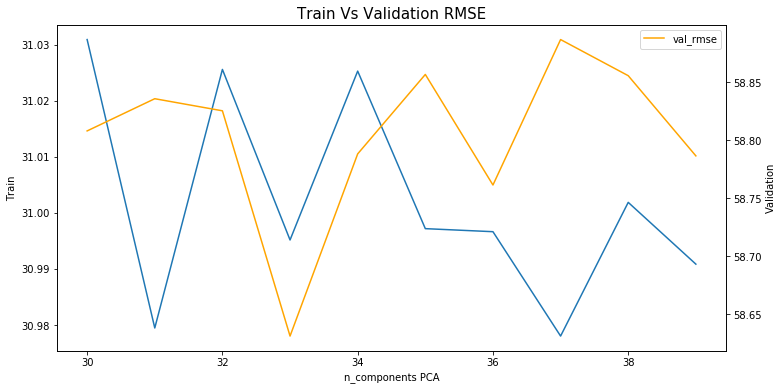

In [225]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(range(30,40,1),train_rmse,label='train_rmse')
ax2 = ax.twinx()
ax2.plot(range(30,40,1),val_rmse,color='orange',label='val_rmse')


ax.set_xlabel('n_components PCA')
#ax.set_ylim(0.434,0.44)
ax.set_ylabel('Train')
ax2.set_ylabel('Validation')
plt.legend()
plt.title('Train Vs Validation RMSE',fontsize=15)

plt.show()

In [227]:
pca = PCA(n_components=31)
train_set_pca = pca.fit_transform(train_set_scaled)
test_set_pca = pca.transform(test_set_scaled)
val_set_pca = pca.transform(val_set_scaled)

rfr = RandomForestRegressor(min_samples_leaf = 100,max_depth=6)
rfr.fit(train_set_pca,y_train)
train_pred = rfr.predict(train_set_pca)
test_pred = rfr.predict(test_set_pca)

np.sqrt(mean_squared_error(y_train,train_pred)), np.sqrt(mean_squared_error(y_test,test_pred))

(30.964506539072012, 35.89794444836714)

In [228]:
train_rmse = list()
val_rmse = list()
for comp in range(10,60,10):
    pca = PCA(n_components=20)
    train_set_pca = pca.fit_transform(train_set_scaled)
    test_set_pca = pca.transform(test_set_scaled)
    val_set_pca = pca.transform(val_set_scaled)

    rfr = SVR(epsilon=0.2)
    rfr.fit(train_set_pca,y_train)
    train_pred = rfr.predict(train_set_pca)
    test_pred = rfr.predict(val_set_pca)

    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred))) 
    val_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))


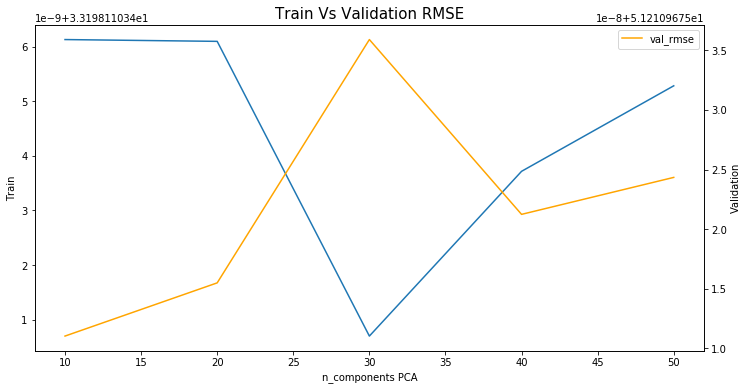

In [230]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(range(10,60,10),train_rmse,label='train_rmse')
ax2 = ax.twinx()
ax2.plot(range(10,60,10),val_rmse,color='orange',label='val_rmse')


ax.set_xlabel('n_components PCA')
#ax.set_ylim(0.434,0.44)
ax.set_ylabel('Train')
ax2.set_ylabel('Validation')
plt.legend()
plt.title('Train Vs Validation RMSE',fontsize=15)

plt.show()

In [208]:
svr_poly = SVR(epsilon=0.2)
svr_poly.fit(train_set_scaledtrain_rmse = list()
val_rmse = list()
for comp in range(30,40,1):
    pca = PCA(n_components=20)
    train_set_pca = pca.fit_transform(train_set_scaled)
    test_set_pca = pca.transform(test_set_scaled)
    val_set_pca = pca.transform(val_set_scaled)

    rfr = RandomForestRegressor(min_samples_leaf = 100,max_depth=6)
    rfr.fit(train_set_pca,y_train)
    train_pred = rfr.predict(train_set_pca)
    test_pred = rfr.predict(val_set_pca)

    train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred))) 
    val_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.plot(range(30,40,1),train_rmse,label='train_rmse')
ax2 = ax.twinx()
ax2.plot(range(30,40,1),val_rmse,color='orange',label='val_rmse')


ax.set_xlabel('n_components PCA')
#ax.set_ylim(0.434,0.44)
ax.set_ylabel('Train')
ax2.set_ylabel('Validation')
plt.legend()
plt.title('Train Vs Validation RMSE',fontsize=15)

plt.show(),y_train_clip)

svr_poly_train_pred = svr_poly.predict(train_set_scaled)
svr_poly_test_pred = svr_poly.predict(test_set_scaled)

np.sqrt(mean_squared_error(y_train_clip,svr_poly_train_pred)),np.sqrt(mean_squared_error(y_test,svr_poly_test_pred))

(12.085669161364512, 24.31180491658494)

### Convolutional Neural Networks

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 117, 16)           80        
_________________________________________________________________
flatten_15 (Flatten)         (None, 1872)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                59936     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 33        
Total params: 60,049
Trainable params: 60,049
Non-trainable params: 0
_________________________________________________________________
9909/1 [===============================================================================================================================================================================================================================================

3886.8881818197947
RMSE: 25.7335


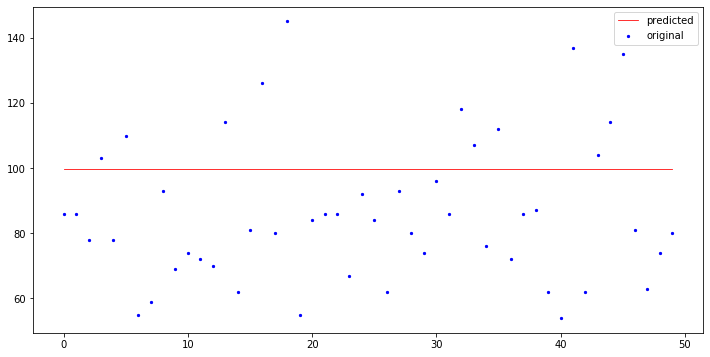

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

x = train_set
xtrain = x.reshape(x.shape[0], x.shape[1], 1)
xtest = test_set.reshape(test_set.shape[0],test_set.shape[1],1)
ytrain = y_train.values
ytest = y_test.values

model = Sequential()
model.add(Conv1D(16, 4, activation="relu", input_shape=(120,1)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("RMSE: %.4f" % np.sqrt(mean_squared_error(ytest, ypred)))

x_ax = range(len(ypred))
plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 117, 16)           80        
_________________________________________________________________
flatten_6 (Flatten)          (None, 1872)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                59936     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 60,049
Trainable params: 60,049
Non-trainable params: 0
_________________________________________________________________
9909/1 [================================================================================================================================================================================================================================================

3883.9871870151187
MSE: 717.4122


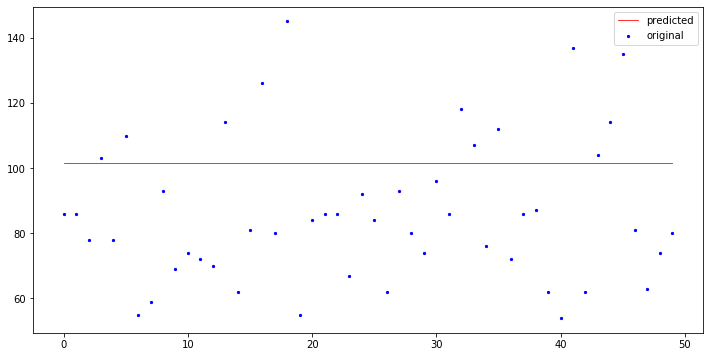

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten

x = train_set
xtrain = x.reshape(x.shape[0], x.shape[1], 1)
xtest = test_set.reshape(test_set.shape[0],test_set.shape[1],1)
ytrain = y_train.values
ytest = y_test.values

model = Sequential()
model.add(Conv1D(16, 4, activation="relu", input_shape=(120,1)))
model.add(Flatten())
model.add(Dense(32, activation="tanh"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % mean_squared_error(ytest, ypred))

x_ax = range(len(ypred))
plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 117, 16)           80        
_________________________________________________________________
average_pooling1d (AveragePo (None, 58, 16)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 58, 8)             136       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 58, 8)             0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 464)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                14880     
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

923.7762473511857
MSE: 34.9839


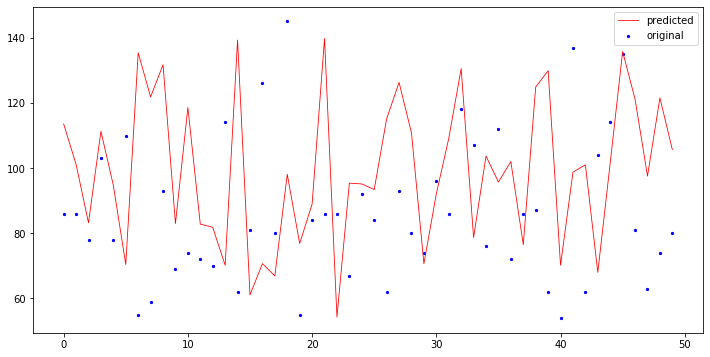

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LeakyReLU, AvgPool1D

x = train_set_scaled
xtrain = x.reshape(x.shape[0], x.shape[1], 1)
xtest = test_set_scaled.reshape(test_set.shape[0],test_set.shape[1],1)
ytrain = y_train.values
ytest = y_test.values

model = Sequential()
model.add(Conv1D(16, 4, activation="relu", input_shape=(120,1)))
model.add(AvgPool1D())
model.add(Conv1D(8, 1))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % np.sqrt(mean_squared_error(ytest, ypred)))

x_ax = range(len(ypred))
plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

9909/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

907.6214182892485
MSE: 34.2179


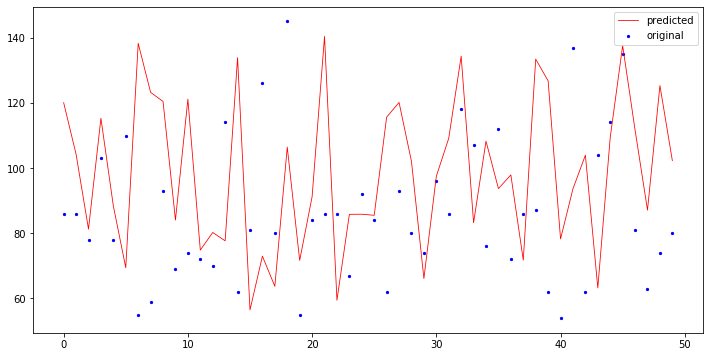

In [81]:
ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % np.sqrt(mean_squared_error(ytest, ypred)))

x_ax = range(len(ypred))
plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 117, 16)           80        
_________________________________________________________________
average_pooling1d_1 (Average (None, 58, 16)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 58, 8)             136       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 58, 8)             0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 464)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                14880     
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

3883.9762959385484
MSE: 26.7655


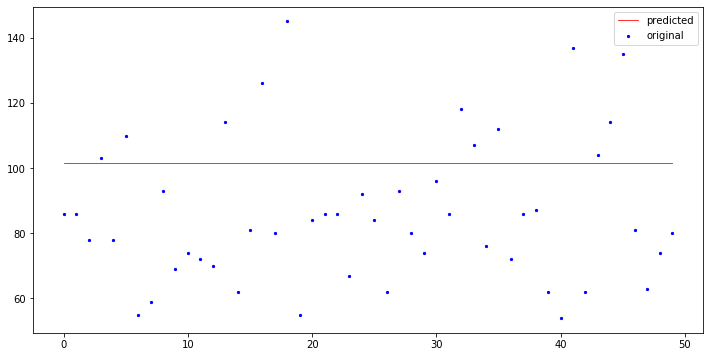

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LeakyReLU, AvgPool1D

x = train_set_scaled
xtrain = x.reshape(x.shape[0], x.shape[1], 1)
xtest = test_set_scaled.reshape(test_set.shape[0],test_set.shape[1],1)
ytrain = y_train.values
ytest = y_test.values

model = Sequential()
model.add(Conv1D(16, 4, activation="tanh", input_shape=(120,1)))
model.add(AvgPool1D())
model.add(Conv1D(8, 1))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(32, activation="tanh"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

ypred = model.predict(xtest)
print(model.evaluate(xtrain, ytrain))
print("MSE: %.4f" % np.sqrt(mean_squared_error(ytest, ypred)))

x_ax = range(len(ypred))
plt.figure(figsize=(12,6))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [231]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 117, 16)           80        
_________________________________________________________________
average_pooling1d_1 (Average (None, 58, 16)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 58, 8)             136       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 58, 8)             0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 464)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                14880     
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

In [109]:
result_dict = {'Model':[],'Processing':[],'RMSE':[],'R_sqrd':[]}

In [69]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [68]:
def evaluate_rmse(y_true,y_pred):
    RMSE = round(np.sqrt(mean_squared_error(y_true,y_pred)),2)
    return RMSE

In [71]:
e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train)-1)


e = y_train - lr_train_pred
sse = np.sum(e**2)
mse = sse/(len(X_train)-len(X_train.columns)-1)

r_sqrd = 1 - mse/mst
print('R_sqrd train: ',r_sqrd)
print('RMSE: ',evaluate_rmse(y_train,lr_train_pred))

lr_test_pred = lr.predict(X_test)
e = y_test - lr_test_pred
sse = np.sum(e**2)
mse = sse/(len(X_test)-len(X_train.columns)-1)

r_sqrd = mse/mst

print('R_sqrd test: ',r_sqrd)
print('RMSE: ',evaluate_rmse(y_test,lr_test_pred))

R_sqrd train:  0.6643725419733363
RMSE:  36.05
R_sqrd test:  0.4545720765841401
RMSE:  35.13


In [ ]:
## sd = 0 => matrix is singular

In [113]:
result_dict['Model'].append('Linear Regression - Train')
result_dict['Processing'].append('Removed constant features')
result_dict['RMSE'].append(0.67)
result_dict['R_sqrd'].append(35.83)

In [35]:
# splitting the train data into train(90%) and validation(10%)

X_train = readings_lr[readings_lr['Engine id']<47].drop(labels=['Engine id','Cycle number','cycles_to_failure']
                                                        ,axis=1)
y_train = readings_lr[readings_lr['Engine id']<47]['cycles_to_failure']
X_val = readings_lr[readings_lr['Engine id']>=47].drop(labels=['Engine id','Cycle number','cycles_to_failure']
                                                        ,axis=1)
y_val = readings_lr[readings_lr['Engine id']>=47]['cycles_to_failure']

In [36]:
lr_trn_val = LinearRegression()
lr_trn_val.fit(X_train,y_train)
lr_pred_train = lr_trn_val.predict(X_train)
lr_pred_val = lr_trn_val.predict(X_val)
lr_pred_test = lr_trn_val.predict(X_test)

In [40]:
e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train)-1)

#train
e = y_train - lr_pred_train
sse = np.sum(e**2)
mse = sse/(len(X_train)-len(X_train.columns)-1)

r_sqrd = 1 - mse/mst
print('R_sqrd train: ',r_sqrd)

#validation
e = y_val - lr_pred_val
sse = np.sum(e**2)
mse = sse/(len(X_val)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

#test
e = y_test - lr_pred_test
sse = np.sum(e**2)
mse = sse/(len(X_test)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

R_sqrd train:  0.6643725419733363
R_sqrd val:  0.29401613445664054
R_sqrd val:  0.4545720765841401


In [117]:
## think if you want to include this
result_dict['Model'].append('Linear Regression - Train')
result_dict['Processing'].append('Removed constant features')
result_dict['RMSE'].append(0.67)
result_dict['R_sqrd'].append(35.83)

    The -ve RMSE is an indication that this model can not do well with the future data. Precisely, it means that the average value of dataset does a better job than the model itself over time.

In [41]:
from sklearn.svm import SVR

In [42]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
svr_pred_train = svr.predict(X_train)
svr_pred_test = svr.predict(X_test)

In [44]:
e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train)-1)

#train
e = y_train - svr_pred_train
sse = np.sum(e**2)
mse = sse/(len(X_train)-len(X_train.columns)-1)

r_sqrd = 1 - mse/mst
print('R_sqrd train: ',r_sqrd)
'''
#validation
e = y_val - lr_pred_val
sse = np.sum(e**2)
mse = sse/(len(X_val)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)
'''
#test
e = y_test - svr_pred_test
sse = np.sum(e**2)
mse = sse/(len(X_test)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd test: ',r_sqrd)

R_sqrd train:  0.5144121777181181
R_sqrd test:  0.709007329032943


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_val_std = ss.transform(X_val)
X_test_std = ss.transform(X_test)

In [47]:
lr_std = LinearRegression()
lr_std.fit(X_train_std,y_train)
lr_std_train_pred = lr_std.predict(X_train_std)
lr_std_val_pred = lr_std.predict(X_val_std)
lr_std_test_pred = lr_std.predict(X_test_std)

In [48]:
e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train)-1)

#train
e = y_train - lr_std_train_pred
sse = np.sum(e**2)
mse = sse/(len(X_train)-len(X_train.columns)-1)

r_sqrd = 1 - mse/mst
print('R_sqrd train: ',r_sqrd)

#validation
e = y_val - lr_std_val_pred
sse = np.sum(e**2)
mse = sse/(len(X_val)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

#test
e = y_test - lr_std_test_pred
sse = np.sum(e**2)
mse = sse/(len(X_test)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

R_sqrd train:  0.6643725419733346
R_sqrd val:  0.2940161344566817
R_sqrd val:  0.454572076583881


In [49]:
svr_std = SVR(kernel='linear')
svr_std.fit(X_train_std,y_train)
svr_std_train_pred = svr_std.predict(X_train_std)
svr_std_val_pred = svr_std.predict(X_val_std)
svr_std_test_pred = svr_std.predict(X_test_std)

In [50]:
e_null = y_train - y_train.mean()
sst = np.sum(e_null**2)
mst = sst/(len(X_train)-1)

#train
e = y_train - svr_std_train_pred
sse = np.sum(e**2)
mse = sse/(len(X_train)-len(X_train.columns)-1)

r_sqrd = 1 - mse/mst
print('R_sqrd train: ',r_sqrd)

#validation
e = y_val - svr_std_val_pred
sse = np.sum(e**2)
mse = sse/(len(X_val)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

#test
e = y_test - svr_std_test_pred
sse = np.sum(e**2)
mse = sse/(len(X_test)-len(X_train.columns)-1)

r_sqrd = mse/mst
print('R_sqrd val: ',r_sqrd)

R_sqrd train:  0.6556287698000434
R_sqrd val:  0.3196668022927178
R_sqrd val:  0.37666376831802095


    Irrespective of standardization, the R_sqrd is still negative. We will have to try a different approach. Like we have seen in the plots for various engine that in the beginning for a few cycles we have a close to constant graph. So let's clip the cycles in the beginning

In [73]:
y_train_clip = y_train.clip(upper=100)

In [53]:
lr.fit(X_train,y_train_clip)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lr_train_pred_clip = lr.predict(X_train)
lr_val_pred_clip = lr.predict(X_val)
lr_test_pred_clip = lr.predict(X_test)

In [61]:
def evaluate(y_train,pred_train,y_val,pred_val,y_test,pred_test):
    e_null = y_train - y_train.mean()
    sst = np.sum(e_null**2)
    mst = sst/(len(X_train)-1)

    #train
    e = y_train - pred_train
    sse = np.sum(e**2)
    mse = sse/(len(X_train)-len(X_train.columns)-1)

    r_sqrd = 1 - mse/mst
    print('R_sqrd train: ',r_sqrd)

    #validation
    e = y_val - pred_val
    sse = np.sum(e**2)
    mse = sse/(len(X_val)-len(X_train.columns)-1)

    r_sqrd = mse/mst
    print('R_sqrd val: ',r_sqrd)

    #test
    e = y_test - pred_test
    sse = np.sum(e**2)
    mse = sse/(len(X_test)-len(X_train.columns)-1)

    r_sqrd = mse/mst
    print('R_sqrd test: ',r_sqrd)

In [62]:
for i in range(100,125,1):
    lr = LinearRegression()
    y_train_clip = y_train.clip(lower=i)
    y_val_clip = y_val.clip(lower=i)
    y_test_clip = y_test.clip(lower=i)
    lr.fit(X_train,y_train_clip)
    print('Clipping at: ',i)
    evaluate(y_train_clip,lr.predict(X_train),y_val_clip,lr.predict(X_val),y_test_clip,lr.predict(X_test))
    print()

Clipping at:  100
R_sqrd train:  0.3419420191404522
R_sqrd val:  0.6352770008555194
R_sqrd test:  0.7733835805751005

Clipping at:  101
R_sqrd train:  0.338192516555578
R_sqrd val:  0.6386018821971814
R_sqrd test:  0.765579806047412

Clipping at:  102
R_sqrd train:  0.334455573761268
R_sqrd val:  0.6418659869938141
R_sqrd test:  0.7581673241937776

Clipping at:  103
R_sqrd train:  0.33072984498575164
R_sqrd val:  0.6450964573537352
R_sqrd test:  0.7511631345413254

Clipping at:  104
R_sqrd train:  0.32701467983315413
R_sqrd val:  0.6482857847640249
R_sqrd test:  0.7428366467207648

Clipping at:  105
R_sqrd train:  0.3233148562632816
R_sqrd val:  0.6513945192340495
R_sqrd test:  0.7343179019225802

Clipping at:  106
R_sqrd train:  0.3196209306889689
R_sqrd val:  0.6544534083443206
R_sqrd test:  0.7261783747063826

Clipping at:  107
R_sqrd train:  0.3159472204079964
R_sqrd val:  0.657431664781501
R_sqrd test:  0.7184277372927425

Clipping at:  108
R_sqrd train:  0.3122927802277805
R_sqrd

In [201]:
from sklearn.preprocessing import PolynomialFeatures

In [202]:
poly = PolynomialFeatures(2)

X_train_transformed = poly.fit_transform(X_train_std)
X_test_transformed = poly.fit_transform(X_test_std)

In [203]:
lin_r = LinearRegression()
lin_r.fit(X_train_transformed,y_train)
lin_r_train_pred = lin_r.predict(X_train_transformed)
print(evaluate(y_train,lin_r_train_pred))

(0.72, 32.8)


In [204]:
lin_r_test_pred = lin_r.predict(X_test_transformed)
print(evaluate(y_test,lin_r_test_pred))

(-1.27, 32.89)


In [205]:
from sklearn.linear_model import Lasso
lin_r_lasso = Lasso()

In [206]:
lin_r_lasso.fit(X_train,y_train)
lasso_train_pred = lin_r_lasso.predict(X_train)
print(evaluate(y_train,lasso_train_pred))

(0.65, 36.92)


In [207]:
lasso_test_pred = lin_r_lasso.predict(X_test)
print(evaluate(y_test,lasso_test_pred))

(-1.68, 35.76)


In [63]:
import statsmodels.api as sm

In [64]:
lin_reg = sm.OLS(y_train,sm.add_constant(X_train)).fit()

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [65]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cycles_to_failure   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1281.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:04:04   Log-Likelihood:                -45291.
No. Observations:                9051   AIC:                         9.061e+04
Df Residuals:                    9036   BIC:                         9.072e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.086e+05   3.47e+04      3.127      0.002    4.05e+04    1.77e+05
T24           -6.6572      1.229     -5.417      0.000      -9.066      -4.248
T30           -0.3994      0.094     -4.244      0.000      -0.584      -0.215
T50           -0.6480      0.091     -7.107      0.000      -0.827      -0.469
P30            5.9081      0.885      6.679      0.000       4.174       7.642
Nf           -13.1509     11.578     -1.136      0.256     -35.847       9.546
Nc            -0.3250      0.072     -4.503      0.000      -0.466      -0.184
Ps30         -37.8556      3.501    -10.814      0.000     -44.718     -30.993
phi           10.7555      1.176      9.143      0.000       8.450      13.061
NRf          -30.7773     11.364     -2.708      0.007     -53.054      -8.501
NRc           -0.2420      0.083     -2.929      0.003      -0.404      -0.080
BPR         -101.1335     18.417     -5.491      0.000    -137.235     -65.032
htBleed       -1.6832      0.391     -4.304      0.000      -2.450      -0.917
W31           19.7825      3.672      5.387      0.000      12.584      26.980
W32           35.8999      6.209      5.782      0.000      23.729      48.071
==============================================================================
Omnibus:                      517.067   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.814
Skew:                           0.632   Prob(JB):                    6.28e-133
Kurtosis:                       3.138   Cond. No.                     1.18e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
train_pred = lin_reg.predict(sm.add_constant(X_train))
val_pred = lin_reg.predict(sm.add_constant(X_val))
test_pred = lin_reg.predict(sm.add_constant(X_test))
evaluate(y_train,train_pred,y_val,val_pred,y_test,test_pred)

R_sqrd train:  0.6643725419733332
R_sqrd val:  0.2940161344574276
R_sqrd test:  0.4545720765799147


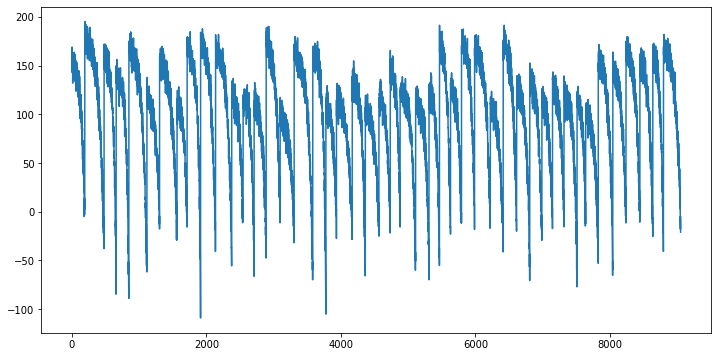

In [67]:
plt.figure(figsize=(12,6))
plt.plot(train_pred)

In [192]:
lr = LinearRegression()
lr.fit(temp.drop(labels=['Engine id','Cycle number','cycles_to_failure'],axis=1),temp['cycles_to_failure'])
pred = lr.predict(temp.drop(labels=['Engine id','Cycle number','cycles_to_failure'],axis=1))

(200, 0)

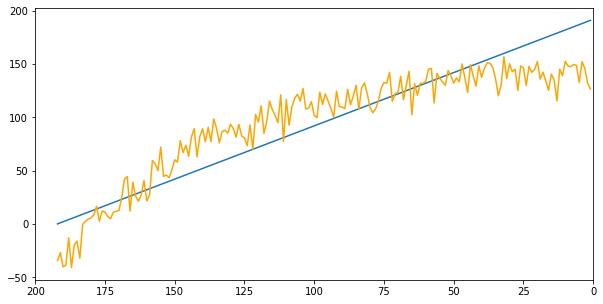

In [200]:
plt.rcParams['figure.figsize'] = (10,5)
temp = readings_lr[engine_readings['Engine id']==1]
plt.plot(temp['Cycle number'],temp['cycles_to_failure'])
plt.plot(temp['Cycle number'],pred,color='orange')
plt.xlim(200,0,-1)

In [214]:
svr_rbf = SVR(kernel='rbf',epsilon=0.0001,C=0.7)
svr_rbf.fit(X_train,y_train)
svr_rbf_train_pred = svr_rbf.predict(X_train)
print(evaluate(y_train,svr_rbf_train_pred))

(-0.0, 62.34)


In [215]:
svr_rbf_test_pred = svr_rbf.predict(X_test)
print(evaluate(y_test,svr_rbf_test_pred))

(-0.29, 24.82)


In [216]:
from sklearn.tree import DecisionTreeRegressor

In [244]:
dt = DecisionTreeRegressor(min_samples_split=34)
dt.fit(X_train,y_train)
dt_train_pred = dt.predict(X_train)
print(evaluate(y_train,dt_train_pred))

(0.84, 24.56)


In [245]:
dt_test_pred = dt.predict(X_test)
print(evaluate(y_test,dt_test_pred))

(-2.16, 38.82)


In [246]:
from sklearn.feature_selection import rfe

/Users/gurumanikanta/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
rec_feat = rfe